- segmentacion en matlab: https://github.com/corentinpla/hackathon-statup-2022/tree/main/Reconnaissance%20Femme_Homme

- Posible modelo cnn en python: https://github.com/NickWilkinson37/voxseg/blob/master/train.py

- Base de datos: https://www.kaggle.com/search?q=Ambient+Noise+Dataset+in%3Adatasets

SI SE PUEDE USAR CNN

### Prueba sin ML

Segmentacion de voces sin ML

In [ ]:
from pydub import AudioSegment

# Carga el archivo de audio
audio = AudioSegment.from_file("tu_archivo.mp3", format="mp3")

# Define los intervalos de tiempo en milisegundos (por ejemplo, 0-10000, 10000-20000, etc.)
intervalos = [(0, 10000), (10000, 20000), (20000, 30000)]

# Divide el archivo en partes
for inicio, fin in intervalos:
    parte = audio[inicio:fin]
    # Haz algo con cada parte (por ejemplo, guárdala en un archivo)
    parte.export(f"parte_{inicio}-{fin}.mp3", format="mp3")


Segfmentacion de vocs sin ML

In [ ]:
import librosa

# Carga el archivo de audio
input_audio_file = "tu_archivo.mp3"
speech, rate = librosa.load(input_audio_file, sr=16000)  # Cargado en frecuencia de 16 kHz

# Define la duración deseada para cada parte (en segundos)
duracion_parte = 10

# Calcula el número de partes
num_partes = int(len(speech) / (rate * duracion_parte))

# Divide el archivo en partes
for i in range(num_partes):
    inicio = i * rate * duracion_parte
    fin = (i + 1) * rate * duracion_parte
    parte = speech[inicio:fin]
    # Haz algo con cada parte (por ejemplo, procesamiento o almacenamiento)


# Montar drive y librerias

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
#!pip install youtube_dl  # Instala el paquete youtube_dl
#!sudo apt-get install ffmpeg
#!pip install yt-dlp
#!pip install librosa matplotlib

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Intento 1 extraccion de audio directo de youtube

# Descargar, cortar y acelerar audio youtube

In [ ]:
import subprocess
def download_and_process_audio(youtube_url, start_time, duration, output_path):
    # Descargar el audio del video
    subprocess.run(f'yt-dlp -f bestaudio --extract-audio --audio-format m4a --output "original_audio_{youtube_url[-5:]}.%(ext)s" {youtube_url}', shell=True)

    # Cortar el audio y ajustar la velocidad
    subprocess.run(f'ffmpeg -ss {start_time} -t {duration} -i original_audio_{youtube_url[-5:]}.m4a -filter:a "atempo=1" -vn {output_path}', shell=True)


# Ejemplo de uso de la función
youtube_url = 'https://www.youtube.com/watch?v=YPbIGC_DgEg'  # URL del video de YouTube
start_time = "00:02:00"  # Tiempo de inicio en formato HH:MM:SS
duration = "00:01:00"  # Duración en formato HH:MM:SS
output_path = "/content/drive/MyDrive/ML/Audios/Voces_Claras/Audio17.wav"  # Ruta de salida en Google Drive

# Descargar y procesar el audio
download_and_process_audio(youtube_url, start_time, duration, output_path)
#download_and_process_audio(youtube_url, start_time, duration, output_path)

# Analisis espectrogramas

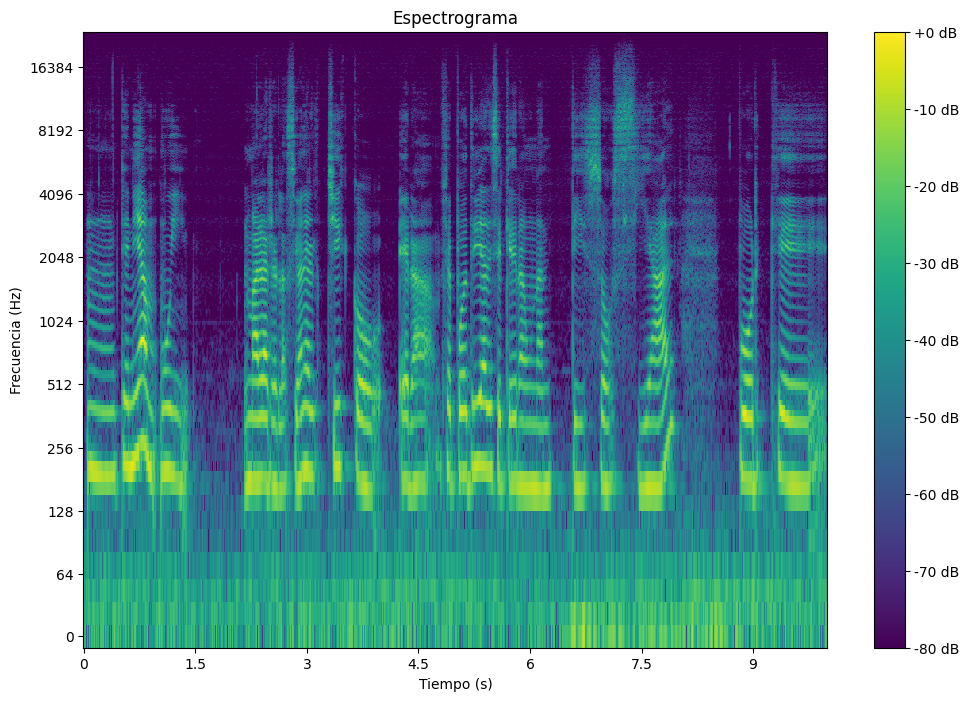

Espectrograma dimensiones: (1025, 938)


In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Cargar el archivo de audio
audio_path = '/content/drive/MyDrive/ML/Audios/Voz/audio1.wav'  # Reemplaza con la ruta de tu archivo de audio
y, sr = librosa.load(audio_path, sr=None)  # sr=None mantiene la frecuencia de muestreo original

# Calcular el espectrograma utilizando Short-Time Fourier Transform (STFT)
D = librosa.stft(y)

# Convertir el espectrograma en una escala logarítmica (dB)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

# Configurar el gráfico del espectrograma
plt.figure(figsize=(12, 8))
librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='log', cmap='viridis')
plt.colorbar(format='%+2.0f dB')
plt.title('Espectrograma')
plt.xlabel('Tiempo (s)')
plt.ylabel('Frecuencia (Hz)')
plt.show()
print(f"Espectrograma dimensiones: {S_db.shape}")

<ipython-input-4-cf277d92c1c7>:8: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, sr=None)  # sr=None mantiene la frecuencia de muestreo original


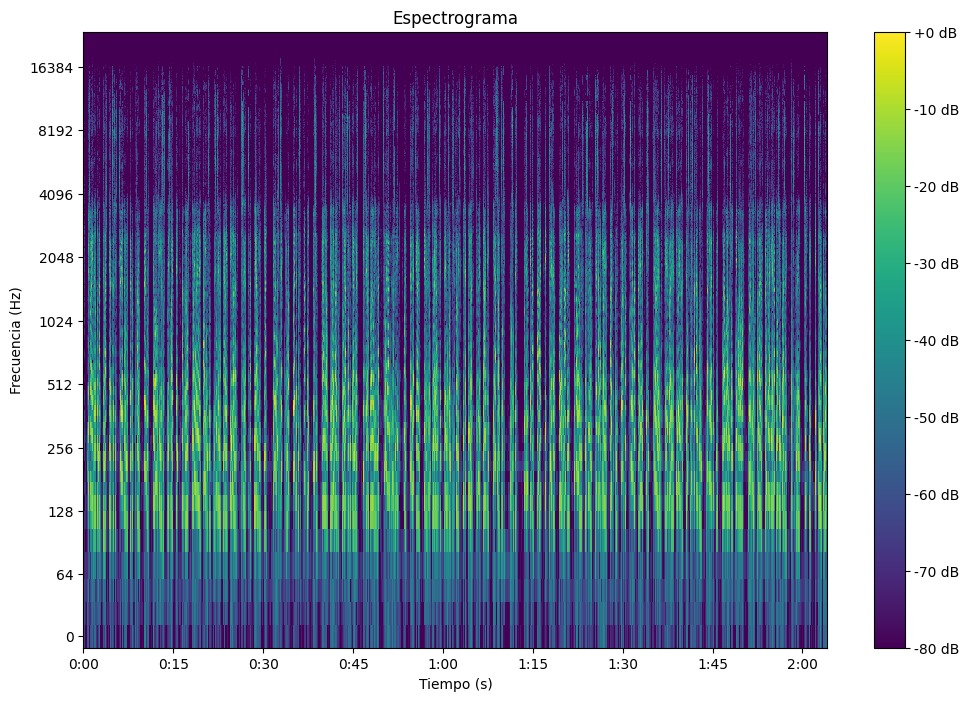

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Cargar el archivo de audio
audio_path = '/content/drive/MyDrive/ML/Audios/Audio2.m4a'  # Reemplaza con la ruta de tu archivo de audio
y, sr = librosa.load(audio_path, sr=None)  # sr=None mantiene la frecuencia de muestreo original

# Calcular el espectrograma utilizando Short-Time Fourier Transform (STFT)
D = librosa.stft(y)

# Convertir el espectrograma en una escala logarítmica (dB)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

# Configurar el gráfico del espectrograma
plt.figure(figsize=(12, 8))
librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='log', cmap='viridis')
plt.colorbar(format='%+2.0f dB')
plt.title('Espectrograma')
plt.xlabel('Tiempo (s)')
plt.ylabel('Frecuencia (Hz)')
plt.show()

1) Los colores representan la amplitud o potencia de las frecuencias presentes en la señal. Los colores mas brillantes indican mayor amplitud o potencia de las frecuencias.

2) Se ven similitudes en el espectrograma entre las voces teniendo mayor amplitud entre los 100 y 500Hz (segundo formante)

Espectrograma voz clara

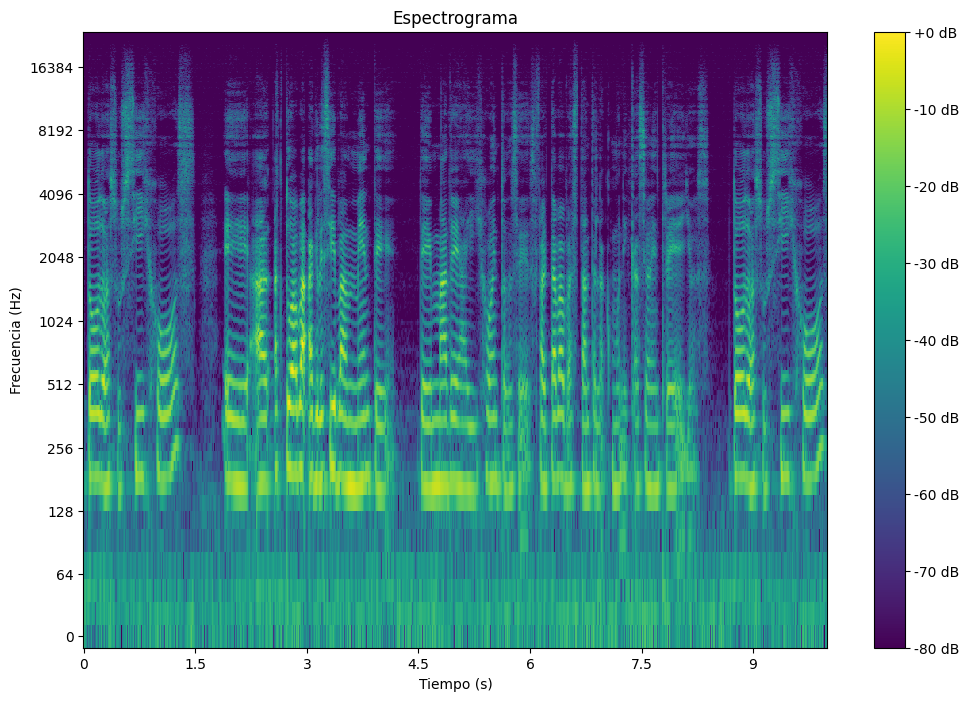

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Cargar el archivo de audio
audio_path = '/content/drive/MyDrive/ML/Audios/Voces_Claras/f06_q04_f02.wav'  # Reemplaza con la ruta de tu archivo de audio
y, sr = librosa.load(audio_path, sr=None)  # sr=None mantiene la frecuencia de muestreo original

# Calcular el espectrograma utilizando Short-Time Fourier Transform (STFT)
D = librosa.stft(y)

# Convertir el espectrograma en una escala logarítmica (dB)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

# Configurar el gráfico del espectrograma
plt.figure(figsize=(12, 8))
librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='log', cmap='viridis')
plt.colorbar(format='%+2.0f dB')
plt.title('Espectrograma')
plt.xlabel('Tiempo (s)')
plt.ylabel('Frecuencia (Hz)')
plt.show()

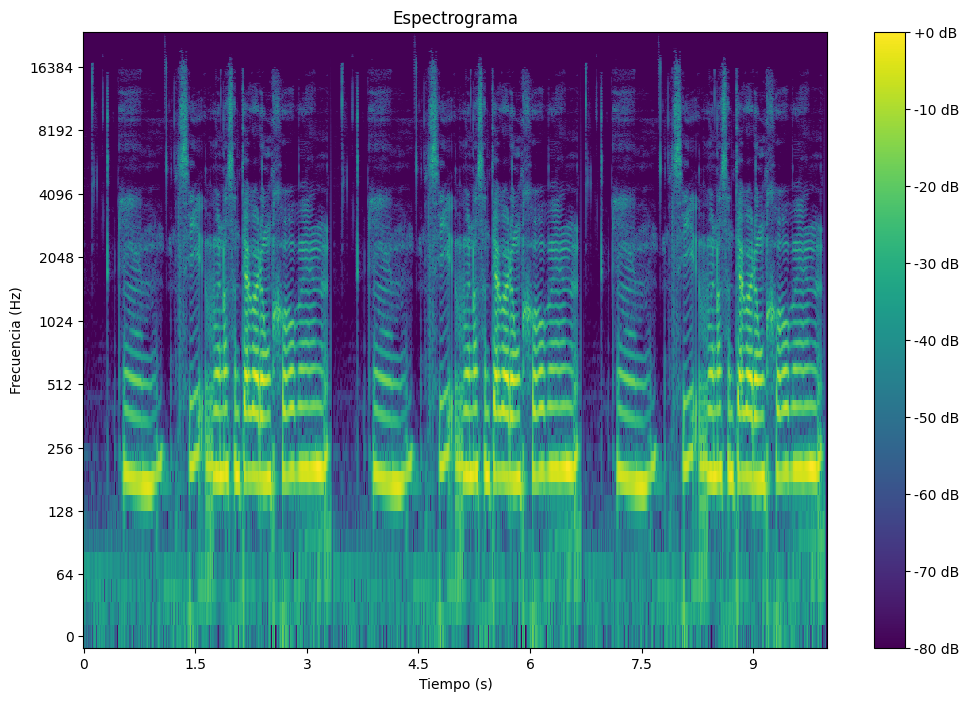

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Cargar el archivo de audio
audio_path = '/content/drive/MyDrive/ML/Audios/Voces_Claras/f15_q01_t01.wav'  # Reemplaza con la ruta de tu archivo de audio
y, sr = librosa.load(audio_path, sr=None)  # sr=None mantiene la frecuencia de muestreo original

# Calcular el espectrograma utilizando Short-Time Fourier Transform (STFT)
D = librosa.stft(y)

# Convertir el espectrograma en una escala logarítmica (dB)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

# Configurar el gráfico del espectrograma
plt.figure(figsize=(12, 8))
librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='log', cmap='viridis')
plt.colorbar(format='%+2.0f dB')
plt.title('Espectrograma')
plt.xlabel('Tiempo (s)')
plt.ylabel('Frecuencia (Hz)')
plt.show()

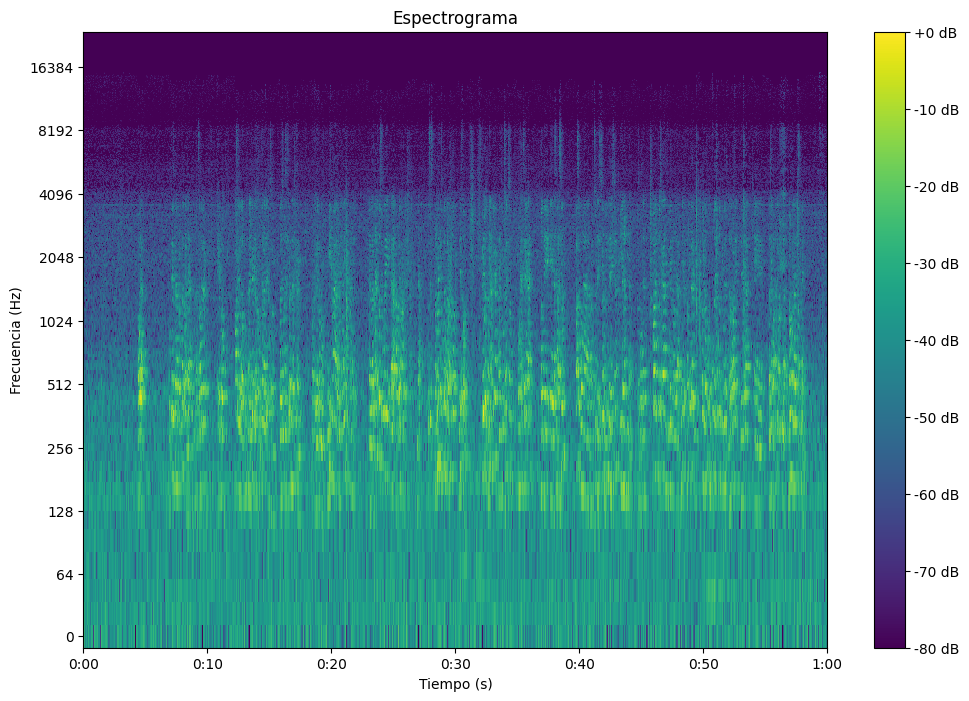

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Cargar el archivo de audio
audio_path = '/content/drive/MyDrive/ML/Audios/Voces en salas/centroSalaMachineCortado.wav'  # Reemplaza con la ruta de tu archivo de audio
y, sr = librosa.load(audio_path, sr=None)  # sr=None mantiene la frecuencia de muestreo original

# Calcular el espectrograma utilizando Short-Time Fourier Transform (STFT)
D = librosa.stft(y)

# Convertir el espectrograma en una escala logarítmica (dB)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

# Configurar el gráfico del espectrograma
plt.figure(figsize=(12, 8))
librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='log', cmap='viridis')
plt.colorbar(format='%+2.0f dB')
plt.title('Espectrograma')
plt.xlabel('Tiempo (s)')
plt.ylabel('Frecuencia (Hz)')
plt.show()

# Documentacion

1) U-Net: originalmente para segmentacion de imagenes adaptada a segmentacion de audio. Puede separar en base a espectrograma del audio las diferentes fuentes. Capcidad para aprender relaciones espaciales complejas.


2) Wave-U-Net: variante dde U-Net que trabaja en dominio del tiempo y no en dominio de la frecuencia. Evita posibles problemas de la FFT. Utilizado en tareas de separacion de fuentes de audio.


3) Conv-TasNet modelo de red convolucional que opera en el dominio del tiempo. Usado para separar fuentes de audio. Ideal para mezclas complejas.


4) Deep Clustering (DPCL): transforma segmentos de audio en embeddings de alta dimension que se agrupan para separar fuentes. Permite la separacion de un numero arbitrario de fuentes. Se usa en separacion de instrumentos a partir de multiples fuentes.


5) Waveform-to-Waveform Models: modelos que procesan la forma de onda del audio (Conv-TasNet o DPRNN). Usan directamente las caracteristicas temporales. Separacion de audio en dominio del tiempo

**Ideas**

1) Usar modelo semisupervisado definiendo solo el label voces bien grabadas? considerar grabaciones "malas"?

2) Audios largos mantienen contexto, audios cortos son manejables.

# Ejemplo U-net (CNN)

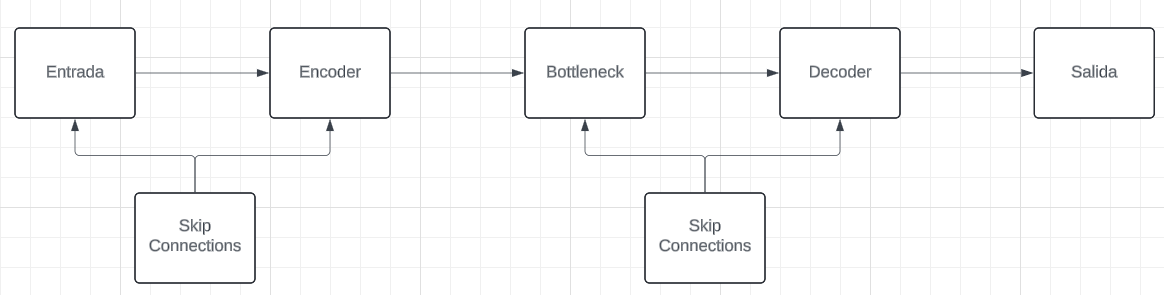

1) Entrada: Espectrograma de tamaño fijo

2) Encoder (codificador): bloque de 2 capas convolucionales seguidas de una capa "max pooling" (tecnica de submuestreo que reduce el tamaño de las caracteristicas extraidas en la capa de convolucion). se reducen las dimensiones espaciales y aumenta la profundidad.

***Preparacion de los datos (calculo espectrogramas)***

# intento 1, no funciona

In [ ]:
#Conversion de audios a espectrogramas
import librosa
import numpy as np
import os

# Función para cargar un archivo de audio y convertirlo en un espectrograma
# Función para cargar un archivo de audio y convertirlo en un espectrograma
def audio_to_spectrogram(file_path, n_mels=256, n_fft=2048, hop_length=512):
    y, sr = librosa.load(file_path)  # Carga el archivo de audio y devuelve la señal de audio y la tasa de muestreo
    # Usa argumentos de palabras clave explícitamente
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels, n_fft=n_fft, hop_length=hop_length)  # Calcula el espectrograma mel del audio
    S_db = librosa.power_to_db(S, ref=np.max)  # Convierte el espectrograma mel a escala logarítmica (dB)
    return S_db  # Retorna el espectrograma en dB


# Función para ajustar el tamaño del espectrograma
def resize_spectrogram(spectrogram, target_shape):
    if spectrogram.shape[1] > target_shape[1]:  # Si el ancho del espectrograma es mayor que el objetivo
        spectrogram = spectrogram[:, :target_shape[1]]  # Recorta el espectrograma al ancho objetivo
    elif spectrogram.shape[1] < target_shape[1]:  # Si el ancho del espectrograma es menor que el objetivo
        padding = target_shape[1] - spectrogram.shape[1]  # Calcula el padding necesario
        spectrogram = np.pad(spectrogram, ((0, 0), (0, padding)), mode='constant')  # Añade padding con ceros
    return spectrogram  # Retorna el espectrograma ajustado


#######################################################################
# Ruta a la carpeta con los archivos de audio
audio_folder_path = '/content/drive/MyDrive/ML/Audios/Voces_Claras'

# Lista para almacenar los espectrogramas y las etiquetas
spectrograms = []
labels = []

# Procesar todos los archivos de audio en la carpeta
for file_name in os.listdir(audio_folder_path):
    if file_name.endswith('.wav'):
        file_path = os.path.join(audio_folder_path, file_name)
        spectrogram = audio_to_spectrogram(file_path)
        spectrogram = resize_spectrogram(spectrogram, (256, 256))
        spectrograms.append(spectrogram)
        # Aquí puedes añadir el código para añadir la etiqueta correspondiente
        # labels.append(label)

# Convertir las listas a arrays de numpy y añadir una dimensión extra para el canal
X = np.array(spectrograms)[..., np.newaxis]
y = np.array(labels)


<ipython-input-3-d03cc60e744a>:9: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path)  # Carga el archivo de audio y devuelve la señal de audio y la tasa de muestreo
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-3-d03cc60e744a>:9: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path)  # Carga el archivo de audio y devuelve la señal de audio y la tasa de muestreo
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-3-d03cc60e744a>:9: UserWarning: P

***Dividir dataset***

In [ ]:
#Dividir dataset
from sklearn.model_selection import train_test_split

# Dividir el dataset en entrenamiento (70%), validación (15%) y prueba (15%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de validación:", X_val.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)


ValueError: Found input variables with inconsistent numbers of samples: [814, 0]

# agregar ruido a audios

In [ ]:
import numpy as np
import librosa
import soundfile as sf
import os

# Función para agregar ruido gaussiano blanco a un audio
def add_gaussian_noise(audio, noise_level=0.005):
    noise = np.random.randn(len(audio))
    augmented_audio = audio + noise_level * noise
    augmented_audio = augmented_audio / np.max(np.abs(augmented_audio))  # Normalizar
    return augmented_audio

# Función para procesar y guardar audios con ruido
def process_and_save_audios(audio_paths, save_directory, noise_level=0.005):
    if not os.path.exists(save_directory):
        os.makedirs(save_directory)

    for audio_path in audio_paths:
        y, sr = librosa.load(audio_path, sr=None)  # Cargar el audio
        y_noisy = add_gaussian_noise(y, noise_level)  # Agregar ruido gaussiano blanco

        # Obtener el nombre del archivo sin la ruta y agregar prefijo "noisy_"
        file_name = os.path.basename(audio_path)
        save_path = os.path.join(save_directory, f'noisy_{file_name}')

        # Guardar el audio con ruido
        sf.write(save_path, y_noisy, sr)
        print(f'Archivo guardado: {save_path}')

# Lista de rutas de archivos de audio
audio_paths = [
    '/content/drive/MyDrive/ML/Audios/Voces_Claras/m04_q17_f17.wav',
    '/content/drive/MyDrive/ML/Audios/Voces_Claras/m10_q03_t05.wav',
    '/content/drive/MyDrive/ML/Audios/Voces_Claras/m18_q20_f20.wav'
    # Agrega más rutas según sea necesario
]

# Ruta para guardar los audios con ruido
save_directory = '/content/drive/MyDrive/ML/Audios/Audios_con_ruido'

# Nivel de ruido
noise_level = 0.005  # Ajusta este valor según sea necesario

# Procesar y guardar los audios con ruido
process_and_save_audios(audio_paths, save_directory, noise_level)


Archivo guardado: /content/drive/MyDrive/ML/Audios/Audios_con_ruido/noisy_m04_q17_f17.wav
Archivo guardado: /content/drive/MyDrive/ML/Audios/Audios_con_ruido/noisy_m10_q03_t05.wav
Archivo guardado: /content/drive/MyDrive/ML/Audios/Audios_con_ruido/noisy_m18_q20_f20.wav


***Entrenar modelo***

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate
from tensorflow.keras.models import Model

# Definir la arquitectura del modelo U-Net
def unet_model(input_shape):
    inputs = Input(input_shape)  # Definir la capa de entrada con la forma especificada
    # Encoder (camino de contracción)
    c1 = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)  # Primera capa convolucional
    c1 = Conv2D(64, (3, 3), activation='relu', padding='same')(c1)      # Segunda capa convolucional
    p1 = MaxPooling2D((2, 2))(c1)  # Primera capa de pooling para reducir la dimensión

    c2 = Conv2D(128, (3, 3), activation='relu', padding='same')(p1)  # Tercera capa convolucional
    c2 = Conv2D(128, (3, 3), activation='relu', padding='same')(c2)  # Cuarta capa convolucional
    p2 = MaxPooling2D((2, 2))(c2)  # Segunda capa de pooling

    c3 = Conv2D(256, (3, 3), activation='relu', padding='same')(p2)  # Quinta capa convolucional
    c3 = Conv2D(256, (3, 3), activation='relu', padding='same')(c3)  # Sexta capa convolucional
    p3 = MaxPooling2D((2, 2))(c3)  # Tercera capa de pooling

    # Bottleneck (parte más profunda de la red)
    c4 = Conv2D(512, (3, 3), activation='relu', padding='same')(p3)  # Séptima capa convolucional
    c4 = Conv2D(512, (3, 3), activation='relu', padding='same')(c4)  # Octava capa convolucional

    # Decoder (camino de expansión)
    u6 = UpSampling2D((2, 2))(c4)  # Primera capa de upsampling para aumentar la dimensión
    u6 = concatenate([u6, c3])  # Concatenar con la capa correspondiente del encoder
    c6 = Conv2D(256, (3, 3), activation='relu', padding='same')(u6)  # Novena capa convolucional
    c6 = Conv2D(256, (3, 3), activation='relu', padding='same')(c6)  # Décima capa convolucional

    u7 = UpSampling2D((2, 2))(c6)  # Segunda capa de upsampling
    u7 = concatenate([u7, c2])  # Concatenar con la capa correspondiente del encoder
    c7 = Conv2D(128, (3, 3), activation='relu', padding='same')(u7)  # Undécima capa convolucional
    c7 = Conv2D(128, (3, 3), activation='relu', padding='same')(c7)  # Duodécima capa convolucional

    u8 = UpSampling2D((2, 2))(c7)  # Tercera capa de upsampling
    u8 = concatenate([u8, c1])  # Concatenar con la capa correspondiente del encoder
    c8 = Conv2D(64, (3, 3), activation='relu', padding='same')(u8)  # Decimotercera capa convolucional
    c8 = Conv2D(64, (3, 3), activation='relu', padding='same')(c8)  # Decimocuarta capa convolucional

    outputs = Conv2D(1, (1, 1), activation='sigmoid')(c8)  # Capa de salida con activación sigmoid para segmentación
    model = Model(inputs, outputs)  # Definir el modelo con las capas de entrada y salida
    return model  # Retornar el modelo U-Net


###################################################################################################################
# Especificar el tamaño de entrada (por ejemplo, un espectrograma de 256x256 con 1 canal)
input_shape = (256, 256, 1)
model = unet_model(input_shape)  # Crear una instancia del modelo U-Net con el tamaño de entrada especificado
# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])  # Compilar el modelo con el optimizador Adam y la función de pérdida de entropía cruzada binaria
# Mostrar el resumen del modelo
model.summary()  # Imprimir un resumen de la arquitectura del modelo


# Suponiendo que tienes datos de entrenamiento (X_train, y_train) y de validación (X_val, y_val)
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

# Guardar el modelo
model.save('/path/to/save/your/model/model_name.h5')  # Cambia la ruta y el nombre del archivo según tus necesidades


Aplicacion del modelo (el auio debe tener la misma duracion que los audios a segmentar?)

In [ ]:
import librosa
import numpy as np
import soundfile as sf
import tensorflow as tf
from tensorflow.keras.models import load_model

# Cargar el modelo U-Net entrenado (asegúrate de que el modelo está en el directorio correcto)
model = load_model('path_to_your_model.h5')

# Función para convertir audio a espectrograma
def audio_to_spectrogram(y, sr, n_fft=2048, hop_length=512):
    S = librosa.stft(y, n_fft=n_fft, hop_length=hop_length)
    S_db = librosa.amplitude_to_db(np.abs(S), ref=np.max)
    return S, S_db

# Función para preparar el espectrograma para el modelo
def prepare_spectrogram(S_db, target_size=(256, 256)):
    S_resized = librosa.util.fix_length(S_db, target_size[1], axis=1)  # Asegura que el tamaño sea correcto
    S_expanded = np.expand_dims(S_resized, axis=-1)  # Añade una dimensión de canal
    S_batch = np.expand_dims(S_expanded, axis=0)  # Añade una dimensión de batch
    return S_batch

# Cargar un archivo de audio
audio_path = 'path/to/your/audio.wav'
y, sr = librosa.load(audio_path, sr=None, duration=60)  # Asumiendo que deseas solo el primer minuto
S, S_db = audio_to_spectrogram(y, sr)

# Preparar el espectrograma para el modelo
S_prepared = prepare_spectrogram(S_db)

# Usar el modelo para predecir la máscara de separación
predicted_mask = model.predict(S_prepared)

# Aplicar la máscara al espectrograma original
S_masked = S * predicted_mask.squeeze()  # Asegúrate de ajustar las dimensiones correctamente

# Convertir el espectrograma enmascarado de vuelta a audio
y_pred = librosa.istft(S_masked)

# Guardar el audio resultante
output_path = 'path/to/your/output_audio.wav'
sf.write(output_path, y_pred, sr)


In [ ]:
import librosa
import numpy as np
import soundfile as sf

# Cargar el modelo U-Net entrenado (asumiendo que ya está cargado en la variable `model`)
# model = cargar_tu_modelo()

# Paso 1: Preparar el archivo de audio
audio_path = 'path/to/your/audio.wav'
y, sr = librosa.load(audio_path, sr=None)  # Cargar audio con la frecuencia de muestreo original
S = librosa.stft(y)  # Calcular el STFT del audio
S_db = librosa.amplitude_to_db(np.abs(S), ref=np.max)  # Convertir a escala de decibeles

# Preparar la entrada para el modelo
S_db_input = np.expand_dims(S_db, axis=0)  # Asumiendo que el modelo espera una dimensión extra para el batch

# Paso 2: Aplicar el modelo U-Net
predicted_masks = model.predict(S_db_input)  # Obtener máscaras predichas

# Paso 3: Aplicar máscaras y reconstruir audio
masked_spectrograms = predicted_masks * S  # Aplicar máscaras al espectrograma complejo original

# Inversión del espectrograma para obtener señales de audio separadas
voices = []
for i in range(masked_spectrograms.shape[0]):  # Asumiendo que la primera dimensión es el número de fuentes
    separated_audio = librosa.istft(masked_spectrograms[i])
    voices.append(separated_audio)
    sf.write(f'voice_{i}.wav', separated_audio, sr)  # Guardar cada voz separada como archivo WAV

# Cada voz separada ha sido guardada como un archivo individual


# Codigo completo, no funciona

In [ ]:
#Conversion de audios a espectrogramas
import librosa
import numpy as np
import os


############################################################################################################### CARGAR AUDIOS Y CLCULAR ESPECTROGRAMAS


# Función para cargar un archivo de audio y convertirlo en un espectrograma
# Función para cargar un archivo de audio y convertirlo en un espectrograma
def audio_to_spectrogram(file_path, n_mels=256, n_fft=2048, hop_length=512):
    y, sr = librosa.load(file_path)  # Carga el archivo de audio y devuelve la señal de audio y la tasa de muestreo
    # Usa argumentos de palabras clave explícitamente
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels, n_fft=n_fft, hop_length=hop_length)  # Calcula el espectrograma mel del audio
    S_db = librosa.power_to_db(S, ref=np.max)  # Convierte el espectrograma mel a escala logarítmica (dB)
    return S_db  # Retorna el espectrograma en dB


# Función para ajustar el tamaño del espectrograma
def resize_spectrogram(spectrogram, target_shape):
    if spectrogram.shape[1] > target_shape[1]:  # Si el ancho del espectrograma es mayor que el objetivo
        spectrogram = spectrogram[:, :target_shape[1]]  # Recorta el espectrograma al ancho objetivo
    elif spectrogram.shape[1] < target_shape[1]:  # Si el ancho del espectrograma es menor que el objetivo
        padding = target_shape[1] - spectrogram.shape[1]  # Calcula el padding necesario
        spectrogram = np.pad(spectrogram, ((0, 0), (0, padding)), mode='constant')  # Añade padding con ceros
    return spectrogram  # Retorna el espectrograma ajustado


#######################################################################
# Ruta a la carpeta con los archivos de audio
audio_folder_path = '/content/drive/MyDrive/ML/Audios/Voces_Claras'

# Lista para almacenar los espectrogramas y las etiquetas
spectrograms = []
labels = []

# Procesar todos los archivos de audio en la carpeta
for file_name in os.listdir(audio_folder_path):
    if file_name.endswith('.wav'):
        file_path = os.path.join(audio_folder_path, file_name)
        spectrogram = audio_to_spectrogram(file_path)
        spectrogram = resize_spectrogram(spectrogram, (256, 256))
        spectrograms.append(spectrogram)
        # Aquí puedes añadir el código para añadir la etiqueta correspondiente
        # labels.append(label)

# Convertir las listas a arrays de numpy y añadir una dimensión extra para el canal
X = np.array(spectrograms)[..., np.newaxis]
y = np.array(labels)



################################################################################################################## DIVIDIR DATASET

#Dividir dataset
from sklearn.model_selection import train_test_split

# Dividir el dataset en entrenamiento (70%), validación (15%) y prueba (15%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de validación:", X_val.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)


################################################################################################################# ENTRENAR MODELO

import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate
from tensorflow.keras.models import Model

# Definir la arquitectura del modelo U-Net
def unet_model(input_shape):
    inputs = Input(input_shape)  # Definir la capa de entrada con la forma especificada
    # Encoder (camino de contracción)
    c1 = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)  # Primera capa convolucional
    c1 = Conv2D(64, (3, 3), activation='relu', padding='same')(c1)      # Segunda capa convolucional
    p1 = MaxPooling2D((2, 2))(c1)  # Primera capa de pooling para reducir la dimensión

    c2 = Conv2D(128, (3, 3), activation='relu', padding='same')(p1)  # Tercera capa convolucional
    c2 = Conv2D(128, (3, 3), activation='relu', padding='same')(c2)  # Cuarta capa convolucional
    p2 = MaxPooling2D((2, 2))(c2)  # Segunda capa de pooling

    c3 = Conv2D(256, (3, 3), activation='relu', padding='same')(p2)  # Quinta capa convolucional
    c3 = Conv2D(256, (3, 3), activation='relu', padding='same')(c3)  # Sexta capa convolucional
    p3 = MaxPooling2D((2, 2))(c3)  # Tercera capa de pooling

    # Bottleneck (parte más profunda de la red)
    c4 = Conv2D(512, (3, 3), activation='relu', padding='same')(p3)  # Séptima capa convolucional
    c4 = Conv2D(512, (3, 3), activation='relu', padding='same')(c4)  # Octava capa convolucional

    # Decoder (camino de expansión)
    u6 = UpSampling2D((2, 2))(c4)  # Primera capa de upsampling para aumentar la dimensión
    u6 = concatenate([u6, c3])  # Concatenar con la capa correspondiente del encoder
    c6 = Conv2D(256, (3, 3), activation='relu', padding='same')(u6)  # Novena capa convolucional
    c6 = Conv2D(256, (3, 3), activation='relu', padding='same')(c6)  # Décima capa convolucional

    u7 = UpSampling2D((2, 2))(c6)  # Segunda capa de upsampling
    u7 = concatenate([u7, c2])  # Concatenar con la capa correspondiente del encoder
    c7 = Conv2D(128, (3, 3), activation='relu', padding='same')(u7)  # Undécima capa convolucional
    c7 = Conv2D(128, (3, 3), activation='relu', padding='same')(c7)  # Duodécima capa convolucional

    u8 = UpSampling2D((2, 2))(c7)  # Tercera capa de upsampling
    u8 = concatenate([u8, c1])  # Concatenar con la capa correspondiente del encoder
    c8 = Conv2D(64, (3, 3), activation='relu', padding='same')(u8)  # Decimotercera capa convolucional
    c8 = Conv2D(64, (3, 3), activation='relu', padding='same')(c8)  # Decimocuarta capa convolucional

    outputs = Conv2D(1, (1, 1), activation='sigmoid')(c8)  # Capa de salida con activación sigmoid para segmentación
    model = Model(inputs, outputs)  # Definir el modelo con las capas de entrada y salida
    return model  # Retornar el modelo U-Net


###################################################################################################################
# Especificar el tamaño de entrada (por ejemplo, un espectrograma de 256x256 con 1 canal)
input_shape = (256, 256, 1)
model = unet_model(input_shape)  # Crear una instancia del modelo U-Net con el tamaño de entrada especificado
# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])  # Compilar el modelo con el optimizador Adam y la función de pérdida de entropía cruzada binaria
# Mostrar el resumen del modelo
model.summary()  # Imprimir un resumen de la arquitectura del modelo


# Suponiendo que tienes datos de entrenamiento (X_train, y_train) y de validación (X_val, y_val)
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

# Guardar el modelo
model.save('/path/to/save/your/model/model_name.h5')  # Cambia la ruta y el nombre del archivo según tus necesidades


# codigo por ia, no funciona

In [ ]:
import librosa
import numpy as np
import os
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate
from tensorflow.keras.models import Model

# Función para cargar un archivo de audio y convertirlo en un espectrograma
def audio_to_spectrogram(file_path, n_mels=256, n_fft=2048, hop_length=512):
    y, sr = librosa.load(file_path)  # Carga el archivo de audio y devuelve la señal de audio y la tasa de muestreo
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels, n_fft=n_fft, hop_length=hop_length)  # Calcula el espectrograma mel del audio
    S_db = librosa.power_to_db(S, ref=np.max)  # Convierte el espectrograma mel a escala logarítmica (dB)
    return S_db  # Retorna el espectrograma en dB

# Función para ajustar el tamaño del espectrograma
def resize_spectrogram(spectrogram, target_shape):
    if spectrogram.shape[1] > target_shape[1]:  # Si el ancho del espectrograma es mayor que el objetivo
        spectrogram = spectrogram[:, :target_shape[1]]  # Recorta el espectrograma al ancho objetivo
    elif spectrogram.shape[1] < target_shape[1]:  # Si el ancho del espectrograma es menor que el objetivo
        padding = target_shape[1] - spectrogram.shape[1]  # Calcula el padding necesario
        spectrogram = np.pad(spectrogram, ((0, 0), (0, padding)), mode='constant')  # Añade padding con ceros
    return spectrogram  # Retorna el espectrograma ajustado

# Ruta a la carpeta con los archivos de audio
audio_folder_path = '/content/drive/MyDrive/ML/Audios/Voces_Claras'

# Lista para almacenar los espectrogramas y las etiquetas
spectrograms = []
labels = []

# Procesar todos los archivos de audio en la carpeta
for file_name in os.listdir(audio_folder_path):
    if file_name.endswith('.wav'):
        file_path = os.path.join(audio_folder_path, file_name)
        spectrogram = audio_to_spectrogram(file_path)
        spectrogram = resize_spectrogram(spectrogram, (256, 256))
        spectrograms.append(spectrogram)
        # Añadir la etiqueta correspondiente (ajusta según tu criterio)
        label = 1 if 'clear' in file_name.lower() else 0  # Esto es solo un ejemplo
        labels.append(label)

# Convertir las listas a arrays de numpy y añadir una dimensión extra para el canal
X = np.array(spectrograms)[..., np.newaxis]
y = np.array(labels)

# Verificar si las dimensiones de X e y son consistentes
print("Dimensiones de X:", X.shape)
print("Dimensiones de y:", y.shape)

#Dividir dataset
# Dividir el dataset en entrenamiento (70%), validación (15%) y prueba (15%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de validación:", X_val.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)

# Definir la arquitectura del modelo U-Net
def unet_model(input_shape):
    inputs = Input(input_shape)  # Definir la capa de entrada con la forma especificada
    # Encoder (camino de contracción)
    c1 = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)  # Primera capa convolucional
    c1 = Conv2D(64, (3, 3), activation='relu', padding='same')(c1)      # Segunda capa convolucional
    p1 = MaxPooling2D((2, 2))(c1)  # Primera capa de pooling para reducir la dimensión

    c2 = Conv2D(128, (3, 3), activation='relu', padding='same')(p1)  # Tercera capa convolucional
    c2 = Conv2D(128, (3, 3), activation='relu', padding='same')(c2)  # Cuarta capa convolucional
    p2 = MaxPooling2D((2, 2))(c2)  # Segunda capa de pooling

    c3 = Conv2D(256, (3, 3), activation='relu', padding='same')(p2)  # Quinta capa convolucional
    c3 = Conv2D(256, (3, 3), activation='relu', padding='same')(c3)  # Sexta capa convolucional
    p3 = MaxPooling2D((2, 2))(c3)  # Tercera capa de pooling

    # Bottleneck (parte más profunda de la red)
    c4 = Conv2D(512, (3, 3), activation='relu', padding='same')(p3)  # Séptima capa convolucional
    c4 = Conv2D(512, (3, 3), activation='relu', padding='same')(c4)  # Octava capa convolucional

    # Decoder (camino de expansión)
    u6 = UpSampling2D((2, 2))(c4)  # Primera capa de upsampling para aumentar la dimensión
    u6 = concatenate([u6, c3])  # Concatenar con la capa correspondiente del encoder
    c6 = Conv2D(256, (3, 3), activation='relu', padding='same')(u6)  # Novena capa convolucional
    c6 = Conv2D(256, (3, 3), activation='relu', padding='same')(c6)  # Décima capa convolucional

    u7 = UpSampling2D((2, 2))(c6)  # Segunda capa de upsampling
    u7 = concatenate([u7, c2])  # Concatenar con la capa correspondiente del encoder
    c7 = Conv2D(128, (3, 3), activation='relu', padding='same')(u7)  # Undécima capa convolucional
    c7 = Conv2D(128, (3, 3), activation='relu', padding='same')(c7)  # Duodécima capa convolucional

    u8 = UpSampling2D((2, 2))(c7)  # Tercera capa de upsampling
    u8 = concatenate([u8, c1])  # Concatenar con la capa correspondiente del encoder
    c8 = Conv2D(64, (3, 3), activation='relu', padding='same')(u8)  # Decimotercera capa convolucional
    c8 = Conv2D(64, (3, 3), activation='relu', padding='same')(c8)  # Decimocuarta capa convolucional

    outputs = Conv2D(1, (1, 1), activation='sigmoid')(c8)  # Capa de salida con activación sigmoid para segmentación
    model = Model(inputs, outputs)  # Definir el modelo con las capas de entrada y salida
    return model  # Retornar el modelo U-Net

# Especificar el tamaño de entrada (por ejemplo, un espectrograma de 256x256 con 1 canal)
input_shape = (256, 256, 1)
model = unet_model(input_shape)  # Crear una instancia del modelo U-Net con el tamaño de entrada especificado

# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])  # Compilar el modelo con el optimizador Adam y la función de pérdida de entropía cruzada binaria

# Mostrar el resumen del modelo
model.summary()  # Imprimir un resumen de la arquitectura del modelo

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))  # Ajustar el modelo a los datos de entrenamiento y validación

# Evaluar el modelo en el conjunto de prueba
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Guardar el modelo entrenado
model.save('/content/drive/MyDrive/ML/model_name.h5')  # Cambia la ruta y el nombre del archivo según tus necesidades

# Visualizar las curvas de aprendizaje
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

# Gráfico de la pérdida
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.title('Curva de pérdida')
plt.legend()

# Gráfico de la precisión
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.title('Curva de precisión')
plt.legend()

plt.tight_layout()
plt.show()


<ipython-input-5-d0a8bb6b4c47>:11: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path)  # Carga el archivo de audio y devuelve la señal de audio y la tasa de muestreo
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-5-d0a8bb6b4c47>:11: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path)  # Carga el archivo de audio y devuelve la señal de audio y la tasa de muestreo
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-5-d0a8bb6b4c47>:11: UserWarning

Dimensiones de X: (814, 256, 256, 1)
Dimensiones de y: (814,)
Tamaño del conjunto de entrenamiento: (569, 256, 256, 1)
Tamaño del conjunto de validación: (122, 256, 256, 1)
Tamaño del conjunto de prueba: (123, 256, 256, 1)
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 1)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 256, 256, 64)         640       ['input_1[0][0]']             
                                                                                                  
 conv2d_1 (Conv2D)           (None, 256, 256, 64)         36928     ['conv2d[0][0]']              
                                                                     

ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1151, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1209, in compute_loss
        return self.compiled_loss(
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/compile_utils.py", line 277, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 143, in __call__
        losses = call_fn(y_true, y_pred)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 270, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 2532, in binary_crossentropy
        backend.binary_crossentropy(y_true, y_pred, from_logits=from_logits),
    File "/usr/local/lib/python3.10/dist-packages/keras/src/backend.py", line 5822, in binary_crossentropy
        return tf.nn.sigmoid_cross_entropy_with_logits(

    ValueError: `logits` and `labels` must have the same shape, received ((None, 256, 256, 1) vs (None,)).


# codigo 2, funciona pero despues de la primera epoca se obtiene un 100% de presicion y se tiene problema con labels

<ipython-input-1-adee9e0b2b0c>:11: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path)  # Carga el archivo de audio y devuelve la señal de audio y la tasa de muestreo
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-1-adee9e0b2b0c>:11: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path)  # Carga el archivo de audio y devuelve la señal de audio y la tasa de muestreo
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-1-adee9e0b2b0c>:11: UserWarning

Dimensiones de X: (63, 256, 256, 1)
Dimensiones de y: (63, 256, 256, 1)
Tamaño del conjunto de entrenamiento: (44, 256, 256, 1)
Tamaño del conjunto de validación: (9, 256, 256, 1)
Tamaño del conjunto de prueba: (10, 256, 256, 1)
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 1)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 256, 256, 64)         640       ['input_1[0][0]']             
                                                                                                  
 conv2d_1 (Conv2D)           (None, 256, 256, 64)         36928     ['conv2d[0][0]']              
                                                               

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


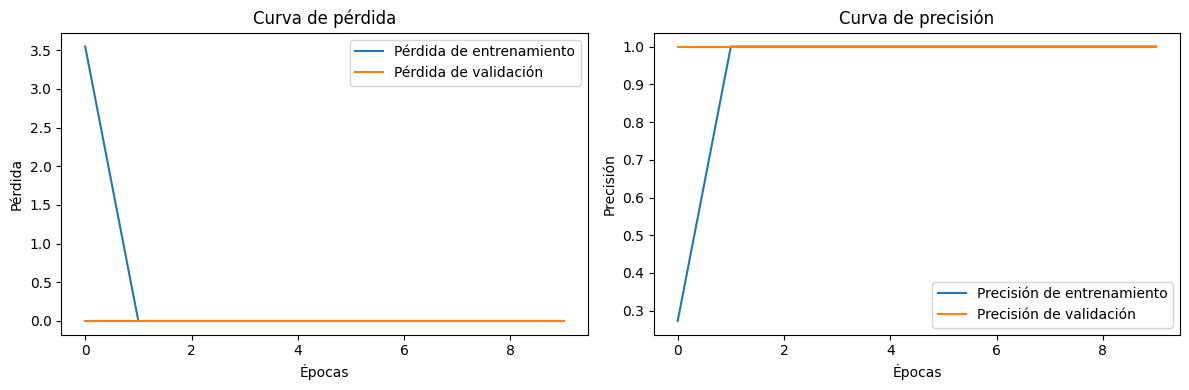

In [ ]:
import librosa
import numpy as np
import os
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate
from tensorflow.keras.models import Model

# Función para cargar un archivo de audio y convertirlo en un espectrograma
def audio_to_spectrogram(file_path, n_mels=256, n_fft=2048, hop_length=512):
    y, sr = librosa.load(file_path)  # Carga el archivo de audio y devuelve la señal de audio y la tasa de muestreo
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels, n_fft=n_fft, hop_length=hop_length)  # Calcula el espectrograma mel del audio
    S_db = librosa.power_to_db(S, ref=np.max)  # Convierte el espectrograma mel a escala logarítmica (dB)
    return S_db  # Retorna el espectrograma en dB

# Función para ajustar el tamaño del espectrograma
def resize_spectrogram(spectrogram, target_shape):
    if spectrogram.shape[1] > target_shape[1]:  # Si el ancho del espectrograma es mayor que el objetivo
        spectrogram = spectrogram[:, :target_shape[1]]  # Recorta el espectrograma al ancho objetivo
    elif spectrogram.shape[1] < target_shape[1]:  # Si el ancho del espectrograma es menor que el objetivo
        padding = target_shape[1] - spectrogram.shape[1]  # Calcula el padding necesario
        spectrogram = np.pad(spectrogram, ((0, 0), (0, padding)), mode='constant')  # Añade padding con ceros
    return spectrogram  # Retorna el espectrograma ajustado

# Ruta a la carpeta con los archivos de audio
audio_folder_path = '/content/drive/MyDrive/ML/Audios/Voces_Claras2'

# Lista para almacenar los espectrogramas y las etiquetas
spectrograms = []
labels = []

# Procesar todos los archivos de audio en la carpeta
for file_name in os.listdir(audio_folder_path):
    if file_name.endswith('.wav'):
        file_path = os.path.join(audio_folder_path, file_name)
        spectrogram = audio_to_spectrogram(file_path)
        spectrogram = resize_spectrogram(spectrogram, (256, 256))
        spectrograms.append(spectrogram)
        # Añadir la etiqueta correspondiente (ajusta según tu criterio)
        label = np.zeros((256, 256, 1)) if 'clear' in file_name.lower() else np.ones((256, 256, 1))  # Esto es solo un ejemplo
        labels.append(label)

# Convertir las listas a arrays de numpy y añadir una dimensión extra para el canal
X = np.array(spectrograms)[..., np.newaxis]
y = np.array(labels)

# Verificar si las dimensiones de X e y son consistentes
print("Dimensiones de X:", X.shape)
print("Dimensiones de y:", y.shape)

# Dividir el dataset en entrenamiento (70%), validación (15%) y prueba (15%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de validación:", X_val.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)

# Definir la arquitectura del modelo U-Net
def unet_model(input_shape):
    inputs = Input(input_shape)  # Definir la capa de entrada con la forma especificada
    # Encoder (camino de contracción)
    c1 = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)  # Primera capa convolucional
    c1 = Conv2D(64, (3, 3), activation='relu', padding='same')(c1)      # Segunda capa convolucional
    p1 = MaxPooling2D((2, 2))(c1)  # Primera capa de pooling para reducir la dimensión

    c2 = Conv2D(128, (3, 3), activation='relu', padding='same')(p1)  # Tercera capa convolucional
    c2 = Conv2D(128, (3, 3), activation='relu', padding='same')(c2)  # Cuarta capa convolucional
    p2 = MaxPooling2D((2, 2))(c2)  # Segunda capa de pooling

    c3 = Conv2D(256, (3, 3), activation='relu', padding='same')(p2)  # Quinta capa convolucional
    c3 = Conv2D(256, (3, 3), activation='relu', padding='same')(c3)  # Sexta capa convolucional
    p3 = MaxPooling2D((2, 2))(c3)  # Tercera capa de pooling

    # Bottleneck (parte más profunda de la red)
    c4 = Conv2D(512, (3, 3), activation='relu', padding='same')(p3)  # Séptima capa convolucional
    c4 = Conv2D(512, (3, 3), activation='relu', padding='same')(c4)  # Octava capa convolucional

    # Decoder (camino de expansión)
    u6 = UpSampling2D((2, 2))(c4)  # Primera capa de upsampling para aumentar la dimensión
    u6 = concatenate([u6, c3])  # Concatenar con la capa correspondiente del encoder
    c6 = Conv2D(256, (3, 3), activation='relu', padding='same')(u6)  # Novena capa convolucional
    c6 = Conv2D(256, (3, 3), activation='relu', padding='same')(c6)  # Décima capa convolucional

    u7 = UpSampling2D((2, 2))(c6)  # Segunda capa de upsampling
    u7 = concatenate([u7, c2])  # Concatenar con la capa correspondiente del encoder
    c7 = Conv2D(128, (3, 3), activation='relu', padding='same')(u7)  # Undécima capa convolucional
    c7 = Conv2D(128, (3, 3), activation='relu', padding='same')(c7)  # Duodécima capa convolucional

    u8 = UpSampling2D((2, 2))(c7)  # Tercera capa de upsampling
    u8 = concatenate([u8, c1])  # Concatenar con la capa correspondiente del encoder
    c8 = Conv2D(64, (3, 3), activation='relu', padding='same')(u8)  # Decimotercera capa convolucional
    c8 = Conv2D(64, (3, 3), activation='relu', padding='same')(c8)  # Decimocuarta capa convolucional

    outputs = Conv2D(1, (1, 1), activation='sigmoid')(c8)  # Capa de salida con activación sigmoid para segmentación
    model = Model(inputs, outputs)  # Definir el modelo con las capas de entrada y salida
    return model  # Retornar el modelo U-Net

# Especificar el tamaño de entrada (por ejemplo, un espectrograma de 256x256 con 1 canal)
input_shape = (256, 256, 1)
model = unet_model(input_shape)

# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])  # Compilar el modelo con el optimizador Adam y la función de pérdida de entropía cruzada binaria

# Mostrar el resumen del modelo
model.summary()  # Imprimir un resumen de la arquitectura del modelo

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))  # Ajustar el modelo a los datos de entrenamiento y validación

# Evaluar el modelo en el conjunto de prueba
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Guardar el modelo entrenado
model.save('/content/drive/MyDrive/ML/model_name.h5')  # Cambia la ruta y el nombre del archivo según tus necesidades

# Visualizar las curvas de aprendizaje
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

# Gráfico de la pérdida
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.title('Curva de pérdida')
plt.legend()

# Gráfico de la precisión
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.title('Curva de precisión')
plt.legend()

plt.tight_layout()
plt.show()


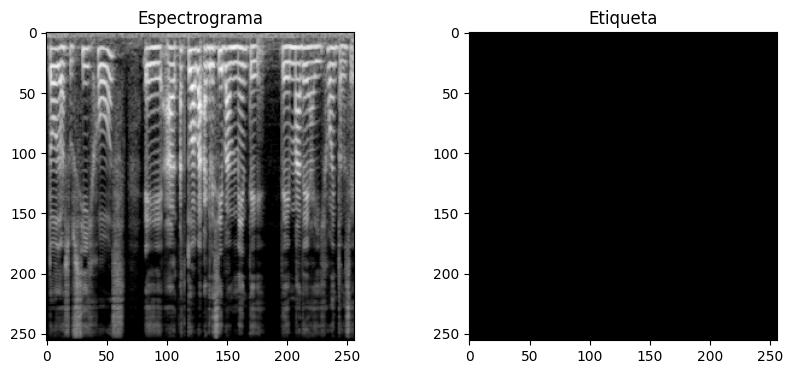

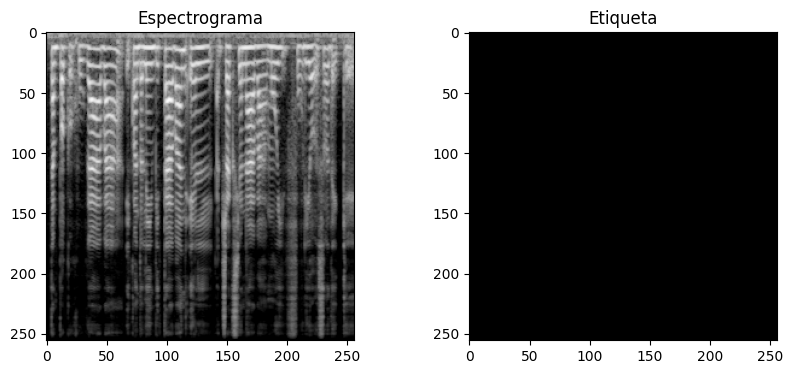

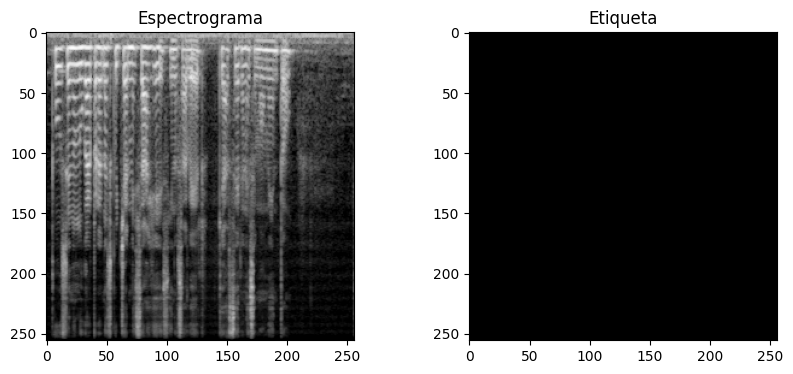

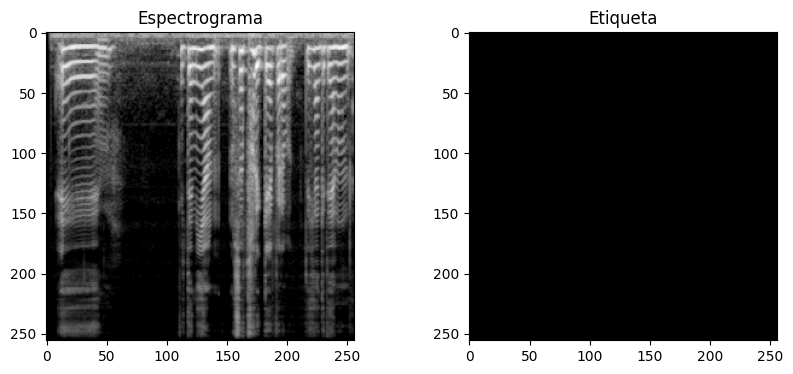

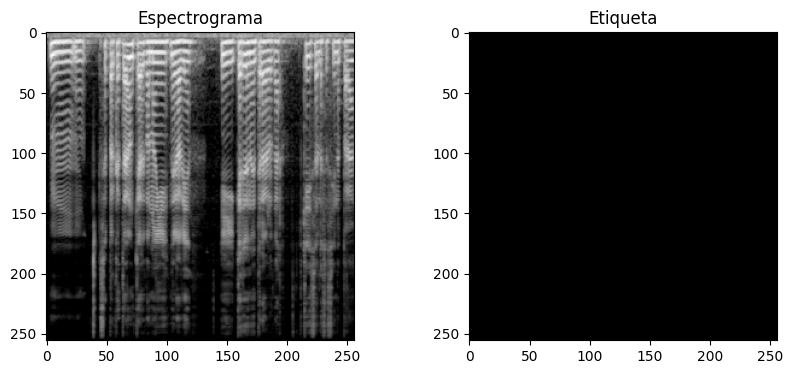

In [ ]:
import matplotlib.pyplot as plt

# Visualizar algunos ejemplos del conjunto de datos
for i in range(5):
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.title("Espectrograma")
    plt.imshow(X_train[i].squeeze(), cmap='gray')
    plt.subplot(1, 2, 2)
    plt.title("Etiqueta")
    plt.imshow(y_train[i].squeeze(), cmap='gray')
    plt.show()


# variacion codigo anterior

In [ ]:
# Imports
import librosa
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate
from tensorflow.keras.models import Model

# Función para cargar un archivo de audio y convertirlo en un espectrograma
def audio_to_spectrogram(file_path, n_mels=256, n_fft=2048, hop_length=512):
    y, sr = librosa.load(file_path)
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels, n_fft=n_fft, hop_length=hop_length)
    S_db = librosa.power_to_db(S, ref=np.max)
    return S_db

# Función para ajustar el tamaño del espectrograma
def resize_spectrogram(spectrogram, target_shape):
    if spectrogram.shape[1] > target_shape[1]:
        spectrogram = spectrogram[:, :target_shape[1]]
    elif spectrogram.shape[1] < target_shape[1]:
        padding = target_shape[1] - spectrogram.shape[1]
        spectrogram = np.pad(spectrogram, ((0, 0), (0, padding)), mode='constant')
    return spectrogram

# Función para generar etiquetas indicando la presencia de voz
def generate_label(spectrogram_shape):
    return np.ones(spectrogram_shape)

# Ruta a la carpeta con los archivos de audio
audio_folder_path = '/content/drive/MyDrive/ML/Audios/Voces_Claras2'

# Lista para almacenar los espectrogramas y las etiquetas
spectrograms = []
labels = []

# Procesar todos los archivos de audio en la carpeta
for file_name in os.listdir(audio_folder_path):
    if file_name.endswith('.wav'):
        file_path = os.path.join(audio_folder_path, file_name)
        spectrogram = audio_to_spectrogram(file_path)
        spectrogram = resize_spectrogram(spectrogram, (256, 256))
        spectrograms.append(spectrogram)

        # Generar etiquetas correspondientes
        label = generate_label(spectrogram.shape)
        labels.append(label)

# Convertir las listas a arrays de numpy y añadir una dimensión extra para el canal
X = np.array(spectrograms)[..., np.newaxis]
y = np.array(labels)[..., np.newaxis]

# Dividir el dataset en entrenamiento (70%), validación (15%) y prueba (15%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de validación:", X_val.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)

# Definir la arquitectura del modelo U-Net
def unet_model(input_shape):
    inputs = Input(input_shape)
    c1 = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    c1 = Conv2D(64, (3, 3), activation='relu', padding='same')(c1)
    p1 = MaxPooling2D((2, 2))(c1)
    c2 = Conv2D(128, (3, 3), activation='relu', padding='same')(p1)
    c2 = Conv2D(128, (3, 3), activation='relu', padding='same')(c2)
    p2 = MaxPooling2D((2, 2))(c2)
    c3 = Conv2D(256, (3, 3), activation='relu', padding='same')(p2)
    c3 = Conv2D(256, (3, 3), activation='relu', padding='same')(c3)
    p3 = MaxPooling2D((2, 2))(c3)
    c4 = Conv2D(512, (3, 3), activation='relu', padding='same')(p3)
    c4 = Conv2D(512, (3, 3), activation='relu', padding='same')(c4)
    u6 = UpSampling2D((2, 2))(c4)
    u6 = concatenate([u6, c3])
    c6 = Conv2D(256, (3, 3), activation='relu', padding='same')(u6)
    c6 = Conv2D(256, (3, 3), activation='relu', padding='same')(c6)
    u7 = UpSampling2D((2, 2))(c6)
    u7 = concatenate([u7, c2])
    c7 = Conv2D(128, (3, 3), activation='relu', padding='same')(u7)
    c7 = Conv2D(128, (3, 3), activation='relu', padding='same')(c7)
    u8 = UpSampling2D((2, 2))(c7)
    u8 = concatenate([u8, c1])
    c8 = Conv2D(64, (3, 3), activation='relu', padding='same')(u8)
    c8 = Conv2D(64, (3, 3), activation='relu', padding='same')(c8)
    outputs = Conv2D(1, (1, 1), activation='sigmoid')(c8)
    model = Model(inputs, outputs)
    return model

input_shape = (256, 256, 1)
model = unet_model(input_shape)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

# Guardar el modelo
model.save('/path/to/save/your/model/model_name.h5')

# Evaluar el modelo en el conjunto de prueba
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

# Visualizar las curvas de aprendizaje
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

# Gráfico de la pérdida
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.title('Curva de pérdida')
plt.legend()

# Gráfico de la precisión
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.title('Curva de precisión')
plt.legend()

plt.tight_layout()
plt.show()



<ipython-input-1-7f4361f6d417>:13: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-1-7f4361f6d417>:13: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-1-7f4361f6d417>:13: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarni

Tamaño del conjunto de entrenamiento: (44, 256, 256, 1)
Tamaño del conjunto de validación: (9, 256, 256, 1)
Tamaño del conjunto de prueba: (10, 256, 256, 1)
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 1)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 256, 256, 64)         640       ['input_1[0][0]']             
                                                                                                  
 conv2d_1 (Conv2D)           (None, 256, 256, 64)         36928     ['conv2d[0][0]']              
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 18s 18s/step - loss: 0.0000e+00 - accuracy: 1.0000
Test Loss: 0.0
Test Accuracy: 1.0


# mismo codigo anterior con menos epocas

<ipython-input-4-d28fa9fb269b>:12: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-4-d28fa9fb269b>:12: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-4-d28fa9fb269b>:12: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarni

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 256, 256, 1)]        0         []                            
                                                                                                  
 conv2d_15 (Conv2D)          (None, 256, 256, 64)         640       ['input_2[0][0]']             
                                                                                                  
 conv2d_16 (Conv2D)          (None, 256, 256, 64)         36928     ['conv2d_15[0][0]']           
                                                                                                  
 max_pooling2d_3 (MaxPoolin  (None, 128, 128, 64)         0         ['conv2d_16[0][0]']           
 g2D)                                                                                       

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


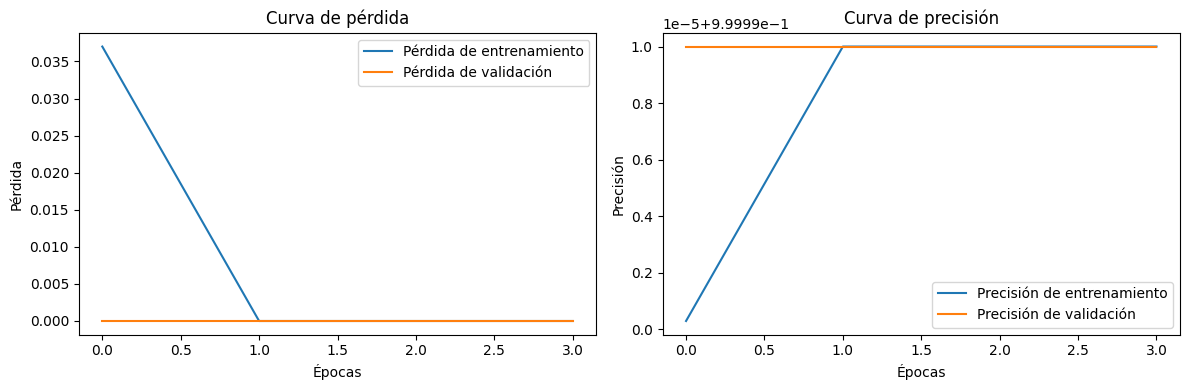

In [ ]:
import librosa
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate
from tensorflow.keras.models import Model

# Función para cargar un archivo de audio y convertirlo en un espectrograma
def audio_to_spectrogram(file_path, n_mels=256, n_fft=2048, hop_length=512):
    y, sr = librosa.load(file_path)
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels, n_fft=n_fft, hop_length=hop_length)
    S_db = librosa.power_to_db(S, ref=np.max)
    return S_db

# Función para ajustar el tamaño del espectrograma
def resize_spectrogram(spectrogram, target_shape):
    if spectrogram.shape[1] > target_shape[1]:
        spectrogram = spectrogram[:, :target_shape[1]]
    elif spectrogram.shape[1] < target_shape[1]:
        padding = target_shape[1] - spectrogram.shape[1]
        spectrogram = np.pad(spectrogram, ((0, 0), (0, padding)), mode='constant')
    return spectrogram

# Ruta a la carpeta con los archivos de audio
audio_folder_path = '/content/drive/MyDrive/ML/Audios/Voces_Claras2'

# Lista para almacenar los espectrogramas y las etiquetas
spectrograms = []
labels = []

# Procesar todos los archivos de audio en la carpeta
for file_name in os.listdir(audio_folder_path):
    if file_name.endswith('.wav'):
        file_path = os.path.join(audio_folder_path, file_name)
        spectrogram = audio_to_spectrogram(file_path)
        spectrogram = resize_spectrogram(spectrogram, (256, 256))
        spectrograms.append(spectrogram)
        # Generar una etiqueta de 256x256 con valores de 1 (presencia de voz)
        labels.append(np.ones((256, 256)))

# Convertir las listas a arrays de numpy y añadir una dimensión extra para el canal
X = np.array(spectrograms)[..., np.newaxis]
y = np.array(labels)[..., np.newaxis]  # Añadir una dimensión extra para el canal en las etiquetas

# Dividir el dataset en entrenamiento (70%), validación (15%) y prueba (15%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Definir la arquitectura del modelo U-Net
def unet_model(input_shape):
    inputs = Input(input_shape)
    c1 = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    c1 = Conv2D(64, (3, 3), activation='relu', padding='same')(c1)
    p1 = MaxPooling2D((2, 2))(c1)

    c2 = Conv2D(128, (3, 3), activation='relu', padding='same')(p1)
    c2 = Conv2D(128, (3, 3), activation='relu', padding='same')(c2)
    p2 = MaxPooling2D((2, 2))(c2)

    c3 = Conv2D(256, (3, 3), activation='relu', padding='same')(p2)
    c3 = Conv2D(256, (3, 3), activation='relu', padding='same')(c3)
    p3 = MaxPooling2D((2, 2))(c3)

    c4 = Conv2D(512, (3, 3), activation='relu', padding='same')(p3)
    c4 = Conv2D(512, (3, 3), activation='relu', padding='same')(c4)

    u6 = UpSampling2D((2, 2))(c4)
    u6 = concatenate([u6, c3])
    c6 = Conv2D(256, (3, 3), activation='relu', padding='same')(u6)
    c6 = Conv2D(256, (3, 3), activation='relu', padding='same')(c6)

    u7 = UpSampling2D((2, 2))(c6)
    u7 = concatenate([u7, c2])
    c7 = Conv2D(128, (3, 3), activation='relu', padding='same')(u7)
    c7 = Conv2D(128, (3, 3), activation='relu', padding='same')(c7)

    u8 = UpSampling2D((2, 2))(c7)
    u8 = concatenate([u8, c1])
    c8 = Conv2D(64, (3, 3), activation='relu', padding='same')(u8)
    c8 = Conv2D(64, (3, 3), activation='relu', padding='same')(c8)

    outputs = Conv2D(1, (1, 1), activation='sigmoid')(c8)
    model = Model(inputs, outputs)
    return model




input_shape = (256, 256, 1)
model = unet_model(input_shape)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

# Reducir el número de épocas a 4
history = model.fit(X_train, y_train, epochs=2, batch_size=32, validation_data=(X_val, y_val))

# Evaluar el modelo en el conjunto de prueba
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

# Guardar el modelo
model.save('/content/drive/MyDrive/ML/model_name.h5')  # Cambia la ruta y el nombre del archivo según tus necesidades





# Visualizar las curvas de aprendizaje
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

# Gráfico de la pérdida
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.title('Curva de pérdida')
plt.legend()

# Gráfico de la precisión
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.title('Curva de precisión')
plt.legend()

plt.tight_layout()
plt.show()


# Prueba del modelo

1/1 [==============================] - 3s 3s/step


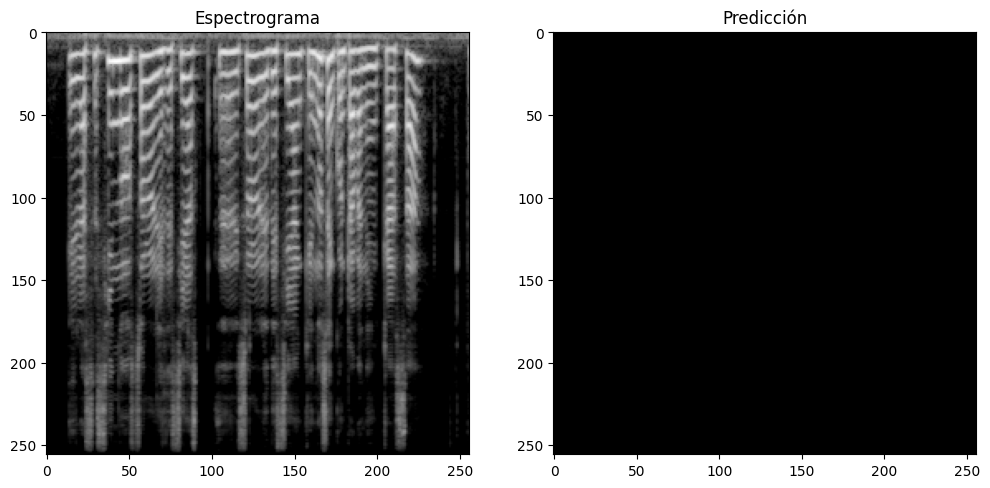

In [ ]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Cargar el modelo entrenado
model = load_model('/content/drive/MyDrive/ML/model_name.h5')  # Cambia la ruta según corresponda

# Función para cargar un archivo de audio y convertirlo en un espectrograma
def audio_to_spectrogram(file_path, n_mels=256, n_fft=2048, hop_length=512):
    y, sr = librosa.load(file_path)
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels, n_fft=n_fft, hop_length=hop_length)
    S_db = librosa.power_to_db(S, ref=np.max)
    return S_db

# Función para ajustar el tamaño del espectrograma
def resize_spectrogram(spectrogram, target_shape):
    if spectrogram.shape[1] > target_shape[1]:
        spectrogram = spectrogram[:, :target_shape[1]]
    elif spectrogram.shape[1] < target_shape[1]:
        padding = target_shape[1] - spectrogram.shape[1]
        spectrogram = np.pad(spectrogram, ((0, 0), (0, padding)), mode='constant')
    return spectrogram

# Ruta al nuevo archivo de audio
new_audio_path = '/content/drive/MyDrive/ML/Audios/Voces_Claras/m04_q17_f17.wav'  # Cambia la ruta según corresponda

# Convertir el nuevo audio en un espectrograma
new_spectrogram = audio_to_spectrogram(new_audio_path)
new_spectrogram = resize_spectrogram(new_spectrogram, (256, 256))

# Añadir una dimensión extra para el canal
X_new = np.expand_dims(new_spectrogram, axis=-1)
X_new = np.expand_dims(X_new, axis=0)  # Añadir dimensión de lote

# Usar el modelo para predecir la presencia de voz en el nuevo espectrograma
predictions = model.predict(X_new)

# Mostrar el espectrograma original y la predicción
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Espectrograma")
plt.imshow(new_spectrogram, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Predicción")
plt.imshow(predictions[0].squeeze(), cmap='gray')

plt.show()


# Prueba con modelo WtoW

In [ ]:
import os
import numpy as np
import librosa
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, UpSampling1D, concatenate
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split

# Función para cargar y procesar los audios
def load_and_process_audio(file_path, sr=16000, duration=3):
    y, _ = librosa.load(file_path, sr=sr, duration=duration)  # Carga el archivo de audio con una tasa de muestreo y duración especificadas
    return y

# Función para cargar todos los audios de una carpeta
def load_audio_files(audio_folder_path, sr=16000, duration=3):
    audio_files = []  # Lista para almacenar los audios cargados
    for file_name in os.listdir(audio_folder_path):  # Itera sobre todos los archivos en la carpeta
        if file_name.endswith('.wav'):  # Comprueba si el archivo es un archivo de audio WAV
            file_path = os.path.join(audio_folder_path, file_name)  # Obtiene la ruta completa del archivo
            y = load_and_process_audio(file_path, sr, duration)  # Carga y procesa el archivo de audio
            audio_files.append(y)  # Añade el audio procesado a la lista
    return np.array(audio_files)  # Convierte la lista a un array de numpy

# Ruta a la carpeta con los archivos de audio
audio_folder_path = '/content/drive/MyDrive/ML/Audios/Voces_Claras2'  # Ruta donde están los archivos de audio

# Cargar los audios y crear etiquetas (1 para presencia de voz)
X = load_audio_files(audio_folder_path)  # Carga los archivos de audio desde la carpeta especificada
y = np.ones(X.shape)  # Crea etiquetas indicando la presencia de voz

# Dividir el dataset en entrenamiento (70%), validación (15%) y prueba (15%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)  # Divide los datos en entrenamiento y no-entrenamiento
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  # Divide los datos no-entrenamiento en validación y prueba

# Función para construir el modelo WtoW
def build_wtow_model(input_shape):
    inputs = Input(input_shape)  # Define la capa de entrada con la forma especificada
    # Encoder
    c1 = Conv1D(64, 3, activation='relu', padding='same')(inputs)  # Primera capa convolucional
    p1 = MaxPooling1D(2)(c1)  # Primera capa de pooling para reducir la dimensión

    c2 = Conv1D(128, 3, activation='relu', padding='same')(p1)  # Segunda capa convolucional
    p2 = MaxPooling1D(2)(c2)  # Segunda capa de pooling

    c3 = Conv1D(256, 3, activation='relu', padding='same')(p2)  # Tercera capa convolucional
    p3 = MaxPooling1D(2)(c3)  # Tercera capa de pooling

    # Bottleneck
    c4 = Conv1D(512, 3, activation='relu', padding='same')(p3)  # Capa convolucional en la parte más profunda de la red

    # Decoder
    u5 = UpSampling1D(2)(c4)  # Primera capa de upsampling para aumentar la dimensión
    u5 = concatenate([u5, c3])  # Concatenar con la capa correspondiente del encoder
    c5 = Conv1D(256, 3, activation='relu', padding='same')(u5)  # Cuarta capa convolucional

    u6 = UpSampling1D(2)(c5)  # Segunda capa de upsampling
    u6 = concatenate([u6, c2])  # Concatenar con la capa correspondiente del encoder
    c6 = Conv1D(128, 3, activation='relu', padding='same')(u6)  # Quinta capa convolucional

    u7 = UpSampling1D(2)(c6)  # Tercera capa de upsampling
    u7 = concatenate([u7, c1])  # Concatenar con la capa correspondiente del encoder
    c7 = Conv1D(64, 3, activation='relu', padding='same')(u7)  # Sexta capa convolucional

    outputs = Conv1D(1, 1, activation='sigmoid', padding='same')(c7)  # Capa de salida con activación sigmoid para segmentación
    model = Model(inputs, outputs)  # Definir el modelo con las capas de entrada y salida
    return model  # Retornar el modelo WtoW

# Construir el modelo
input_shape = (X_train.shape[1], 1)  # Definir la forma de entrada
model = build_wtow_model(input_shape)  # Crear una instancia del modelo WtoW

# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])  # Compilar el modelo con el optimizador Adam y la función de pérdida de entropía cruzada binaria

# Resumir el modelo
model.summary()  # Imprimir un resumen de la arquitectura del modelo

# Entrenar el modelo
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_val, y_val)
)

# Evaluar el modelo
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

# Guardar el modelo
model.save('/content/drive/MyDrive/ML/model_name.h5')  # Cambia la ruta y el nombre del archivo según tus necesidades




# Visualizar las curvas de aprendizaje
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

# Gráfico de la pérdida
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.title('Curva de pérdida')
plt.legend()

# Gráfico de la precisión
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.title('Curva de precisión')
plt.legend()

plt.tight_layout()
plt.show()

<ipython-input-6-16c46616253d>:11: UserWarning: PySoundFile failed. Trying audioread instead.
  y, _ = librosa.load(file_path, sr=sr, duration=duration)  # Carga el archivo de audio con una tasa de muestreo y duración especificadas
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-6-16c46616253d>:11: UserWarning: PySoundFile failed. Trying audioread instead.
  y, _ = librosa.load(file_path, sr=sr, duration=duration)  # Carga el archivo de audio con una tasa de muestreo y duración especificadas
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 48000, 1)]           0         []                            
                                                                                                  
 conv1d (Conv1D)             (None, 48000, 64)            256       ['input_3[0][0]']             
                                                                                                  
 max_pooling1d (MaxPooling1  (None, 24000, 64)            0         ['conv1d[0][0]']              
 D)                                                                                               
                                                                                                  
 conv1d_1 (Conv1D)           (None, 24000, 128)           24704     ['max_pooling1d[0][0]'] 

# modificacion del codigo con mas verificaciones y menor dataset

In [ ]:
import os
import numpy as np
import librosa
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, UpSampling1D, concatenate
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split

# Función para cargar y procesar los audios
def load_and_process_audio(file_path, sr=16000, duration=3):
    y, _ = librosa.load(file_path, sr=sr, duration=duration)  # Carga el archivo de audio con una tasa de muestreo y duración especificadas
    return y

# Función para cargar todos los audios de una carpeta
def load_audio_files(audio_folder_path, sr=16000, duration=3):
    audio_files = []  # Lista para almacenar los audios cargados
    for file_name in os.listdir(audio_folder_path):  # Itera sobre todos los archivos en la carpeta
        if file_name.endswith('.wav'):  # Comprueba si el archivo es un archivo de audio WAV
            file_path = os.path.join(audio_folder_path, file_name)  # Obtiene la ruta completa del archivo
            y = load_and_process_audio(file_path, sr, duration)  # Carga y procesa el archivo de audio
            audio_files.append(y)  # Añade el audio procesado a la lista
    return np.array(audio_files)  # Convierte la lista a un array de numpy

# Ruta a la carpeta con los archivos de audio
audio_folder_path = '/content/drive/MyDrive/ML/Audios/Voces_Claras4'  # Ruta donde están los archivos de audio

# Cargar los audios y crear etiquetas (1 para presencia de voz)
X = load_audio_files(audio_folder_path)  # Carga los archivos de audio desde la carpeta especificada

y = np.ones((X.shape[0], X.shape[1], 1))  # Crea etiquetas indicando la presencia de voz

# Dividir el dataset en entrenamiento (70%), validación (15%) y prueba (15%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)  # Divide los datos en entrenamiento y no-entrenamiento
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  # Divide los datos no-entrenamiento en validación y prueba

# Asegurarse de que las dimensiones de los datos sean correctas
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of X_val: {X_val.shape}")
print(f"Shape of y_val: {y_val.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

# Función para construir el modelo WtoW
def build_wtow_model(input_shape):
    inputs = Input(input_shape)  # Define la capa de entrada con la forma especificada
    # Encoder
    c1 = Conv1D(64, 3, activation='relu', padding='same')(inputs)  # Primera capa convolucional
    p1 = MaxPooling1D(2)(c1)  # Primera capa de pooling para reducir la dimensión

    c2 = Conv1D(128, 3, activation='relu', padding='same')(p1)  # Segunda capa convolucional
    p2 = MaxPooling1D(2)(c2)  # Segunda capa de pooling

    c3 = Conv1D(256, 3, activation='relu', padding='same')(p2)  # Tercera capa convolucional
    p3 = MaxPooling1D(2)(c3)  # Tercera capa de pooling

    # Bottleneck
    c4 = Conv1D(512, 3, activation='relu', padding='same')(p3)  # Capa convolucional en la parte más profunda de la red

    # Decoder
    u5 = UpSampling1D(2)(c4)  # Primera capa de upsampling para aumentar la dimensión
    u5 = concatenate([u5, c3])  # Concatenar con la capa correspondiente del encoder
    c5 = Conv1D(256, 3, activation='relu', padding='same')(u5)  # Cuarta capa convolucional

    u6 = UpSampling1D(2)(c5)  # Segunda capa de upsampling
    u6 = concatenate([u6, c2])  # Concatenar con la capa correspondiente del encoder
    c6 = Conv1D(128, 3, activation='relu', padding='same')(u6)  # Quinta capa convolucional

    u7 = UpSampling1D(2)(c6)  # Tercera capa de upsampling
    u7 = concatenate([u7, c1])  # Concatenar con la capa correspondiente del encoder
    c7 = Conv1D(64, 3, activation='relu', padding='same')(u7)  # Sexta capa convolucional

    outputs = Conv1D(1, 1, activation='sigmoid', padding='same')(c7)  # Capa de salida con activación sigmoid para segmentación
    model = Model(inputs, outputs)  # Definir el modelo con las capas de entrada y salida
    return model  # Retornar el modelo WtoW

# Construir el modelo
input_shape = (X_train.shape[1], 1)  # Definir la forma de entrada
model = build_wtow_model(input_shape)  # Crear una instancia del modelo WtoW

# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])  # Compilar el modelo con el optimizador Adam y la función de pérdida de entropía cruzada binaria

# Resumir el modelo
model.summary()  # Imprimir un resumen de la arquitectura del modelo

# Entrenar el modelo
history = model.fit(
    X_train, y_train,
    epochs=5,
    batch_size=62,
    validation_data=(X_val, y_val)
)

# Evaluar el modelo
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

# Guardar el modelo
model.save('/content/drive/MyDrive/ML/WtoW_menorDataset.h5')  # Cambia la ruta y el nombre del archivo según tus necesidades


Shape of X_train: (5, 48000)
Shape of y_train: (5, 48000, 1)
Shape of X_val: (1, 48000)
Shape of y_val: (1, 48000, 1)
Shape of X_test: (2, 48000)
Shape of y_test: (2, 48000, 1)
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 48000, 1)]           0         []                            
                                                                                                  
 conv1d (Conv1D)             (None, 48000, 64)            256       ['input_1[0][0]']             
                                                                                                  
 max_pooling1d (MaxPooling1  (None, 24000, 64)            0         ['conv1d[0][0]']              
 D)                                                                                               
                

# WtoW con ajuste en dataset

In [ ]:
import os
import numpy as np
import librosa
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, UpSampling1D, concatenate
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split

# Función para cargar y procesar los audios
def load_and_process_audio(file_path, sr=16000, duration=5):
    y, _ = librosa.load(file_path, sr=sr, duration=duration)  # Carga el archivo de audio con una tasa de muestreo y duración especificadas
    return y

# Función para cargar todos los audios de una carpeta
def load_audio_files(audio_folder_path, sr=16000, duration=5):
    audio_files = []  # Lista para almacenar los audios cargados
    for file_name in os.listdir(audio_folder_path):  # Itera sobre todos los archivos en la carpeta
        if file_name.endswith('.wav'):  # Comprueba si el archivo es un archivo de audio WAV
            file_path = os.path.join(audio_folder_path, file_name)  # Obtiene la ruta completa del archivo
            y = load_and_process_audio(file_path, sr, duration)  # Carga y procesa el archivo de audio
            audio_files.append(y)  # Añade el audio procesado a la lista
    return np.array(audio_files)  # Convierte la lista a un array de numpy

# Ruta a las carpetas con los archivos de audio
audio_folder_path_noisy = '/content/drive/MyDrive/ML/Audios/Ruido_ambiente'  # Ruta donde están los archivos de audio con ruido
audio_folder_path_clean = '/content/drive/MyDrive/ML/Audios/Voces_Claras4'  # Ruta donde están los archivos de audio solo con voz

# Cargar los audios y crear etiquetas
X_noisy = load_audio_files(audio_folder_path_noisy)  # Carga los archivos de audio con ruido desde la carpeta especificada
y_clean = load_audio_files(audio_folder_path_clean)  # Carga los archivos de audio solo con voz desde la carpeta especificada, cortados a 5 segundos

# Verifica que X_noisy y y_clean tengan la misma longitud
assert X_noisy.shape == y_clean.shape, "El número de muestras y la longitud de las muestras deben ser iguales."

# Añadir una dimensión extra para que sean compatibles con el modelo
X_noisy = X_noisy[..., np.newaxis]
y_clean = y_clean[..., np.newaxis]

# Dividir el dataset en entrenamiento (70%), validación (15%) y prueba (15%)
X_train, X_temp, y_train, y_temp = train_test_split(X_noisy, y_clean, test_size=0.3, random_state=42)  # Divide los datos en entrenamiento y no-entrenamiento
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  # Divide los datos no-entrenamiento en validación y prueba

# Asegurarse de que las dimensiones de los datos sean correctas
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of X_val: {X_val.shape}")
print(f"Shape of y_val: {y_val.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

# Función para construir el modelo WtoW
def build_wtow_model(input_shape):
    inputs = Input(input_shape)  # Define la capa de entrada con la forma especificada
    # Encoder
    c1 = Conv1D(64, 3, activation='relu', padding='same')(inputs)  # Primera capa convolucional
    p1 = MaxPooling1D(2)(c1)  # Primera capa de pooling para reducir la dimensión

    c2 = Conv1D(128, 3, activation='relu', padding='same')(p1)  # Segunda capa convolucional
    p2 = MaxPooling1D(2)(c2)  # Segunda capa de pooling

    c3 = Conv1D(256, 3, activation='relu', padding='same')(p2)  # Tercera capa convolucional
    p3 = MaxPooling1D(2)(c3)  # Tercera capa de pooling

    # Bottleneck
    c4 = Conv1D(512, 3, activation='relu', padding='same')(p3)  # Capa convolucional en la parte más profunda de la red

    # Decoder
    u5 = UpSampling1D(2)(c4)  # Primera capa de upsampling para aumentar la dimensión
    u5 = concatenate([u5, c3])  # Concatenar con la capa correspondiente del encoder
    c5 = Conv1D(256, 3, activation='relu', padding='same')(u5)  # Cuarta capa convolucional

    u6 = UpSampling1D(2)(c5)  # Segunda capa de upsampling
    u6 = concatenate([u6, c2])  # Concatenar con la capa correspondiente del encoder
    c6 = Conv1D(128, 3, activation='relu', padding='same')(u6)  # Quinta capa convolucional

    u7 = UpSampling1D(2)(c6)  # Tercera capa de upsampling
    u7 = concatenate([u7, c1])  # Concatenar con la capa correspondiente del encoder
    c7 = Conv1D(64, 3, activation='relu', padding='same')(u7)  # Sexta capa convolucional

    outputs = Conv1D(1, 1, activation='sigmoid', padding='same')(c7)  # Capa de salida con activación sigmoid para segmentación
    model = Model(inputs, outputs)  # Definir el modelo con las capas de entrada y salida
    return model  # Retornar el modelo WtoW

# Construir el modelo
input_shape = (X_train.shape[1], 1)  # Definir la forma de entrada
model = build_wtow_model(input_shape)  # Crear una instancia del modelo WtoW

# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])  # Compilar el modelo con el optimizador Adam y la función de pérdida de entropía cruzada binaria

# Resumir el modelo
model.summary()  # Imprimir un resumen de la arquitectura del modelo

X_train_small = X_train[:10]
y_train_small = y_train[:10]





print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of X_val: {X_val.shape}")
print(f"Shape of y_val: {y_val.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")




# Entrenar el modelo
history = model.fit(
    X_train, y_train,
    epochs=2,
    batch_size=16,
    validation_data=(X_val, y_val)
)

# Evaluar el modelo
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

# Guardar el modelo
model.save('/content/drive/MyDrive/ML/WtoW_2_datasets.h5')  # Cambia la ruta y el nombre del archivo según tus necesidades


Shape of X_train: (21, 80000, 1)
Shape of y_train: (21, 80000, 1)
Shape of X_val: (4, 80000, 1)
Shape of y_val: (4, 80000, 1)
Shape of X_test: (5, 80000, 1)
Shape of y_test: (5, 80000, 1)
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 80000, 1)]           0         []                            
                                                                                                  
 conv1d (Conv1D)             (None, 80000, 64)            256       ['input_1[0][0]']             
                                                                                                  
 max_pooling1d (MaxPooling1  (None, 40000, 64)            0         ['conv1d[0][0]']              
 D)                                                                                               
     

# prueba wtow con mas depuracion

Shape of X_noisy: (30, 16000, 1)
Shape of y_clean: (30, 16000, 1)
Shape of X_train: (21, 16000, 1)
Shape of y_train: (21, 16000, 1)
Shape of X_val: (4, 16000, 1)
Shape of y_val: (4, 16000, 1)
Shape of X_test: (5, 16000, 1)
Shape of y_test: (5, 16000, 1)
X_train sample:  [[ 0.10351893]
 [ 0.17429483]
 [ 0.13045582]
 ...
 [-0.00085267]
 [-0.06628172]
 [-0.11484188]]
y_train sample:  [[ 0.        ]
 [ 0.        ]
 [ 0.        ]
 ...
 [-0.09800165]
 [-0.02962358]
 [ 0.05909583]]
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 16000, 1)]           0         []                            
                                                                                                  
 conv1d_8 (Conv1D)           (None, 16000, 16)            64        ['input_2[0][0]']             
        

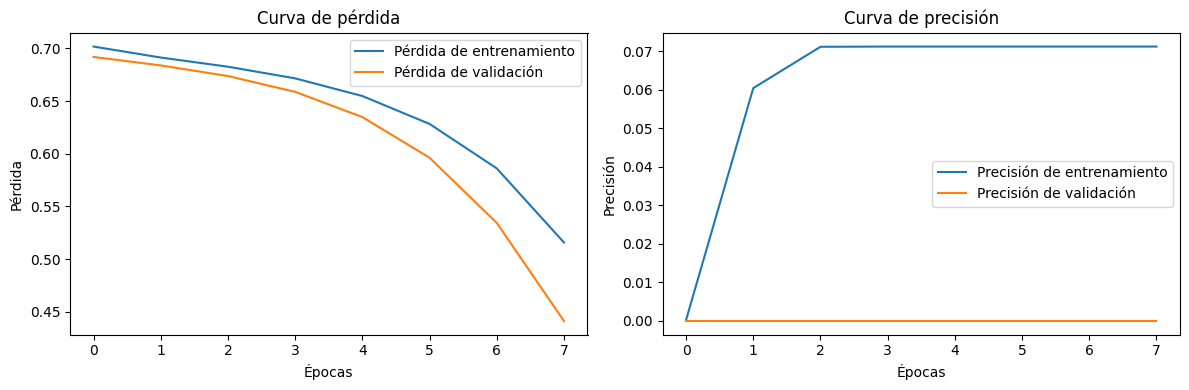

In [ ]:
import os
import numpy as np
import librosa
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, UpSampling1D, concatenate
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
import psutil
import time

# Función para cargar y procesar los audios
def load_and_process_audio(file_path, sr=16000, duration=1):  # Reducir la duración a 1 segundo
    y, _ = librosa.load(file_path, sr=sr, duration=duration)
    return y

# Función para cargar todos los audios de una carpeta
def load_audio_files(audio_folder_path, sr=16000, duration=1):  # Reducir la duración a 1 segundo
    audio_files = []
    for file_name in os.listdir(audio_folder_path):
        if file_name.endswith('.wav'):
            file_path = os.path.join(audio_folder_path, file_name)
            y = load_and_process_audio(file_path, sr, duration)
            audio_files.append(y)
    return np.array(audio_files)

# Ruta a las carpetas con los archivos de audio
audio_folder_path_noisy = '/content/drive/MyDrive/ML/Audios/Ruido_ambiente'  # Ruta donde están los archivos de audio con ruido
audio_folder_path_clean = '/content/drive/MyDrive/ML/Audios/Voces_Claras4'

# Cargar los audios y crear etiquetas
X_noisy = load_audio_files(audio_folder_path_noisy)
y_clean = load_audio_files(audio_folder_path_clean)

# Verifica que X_noisy y y_clean tengan la misma longitud
assert X_noisy.shape == y_clean.shape, "El número de muestras y la longitud de las muestras deben ser iguales."

# Añadir una dimensión extra para que sean compatibles con el modelo
X_noisy = X_noisy[..., np.newaxis]
y_clean = y_clean[..., np.newaxis]

# Verificar las dimensiones de los datos antes de dividir
print(f"Shape of X_noisy: {X_noisy.shape}")
print(f"Shape of y_clean: {y_clean.shape}")

# Dividir el dataset en entrenamiento (70%), validación (15%) y prueba (15%)
X_train, X_temp, y_train, y_temp = train_test_split(X_noisy, y_clean, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Asegurarse de que las dimensiones de los datos sean correctas
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of X_val: {X_val.shape}")
print(f"Shape of y_val: {y_val.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

print("X_train sample: ", X_train[0])
print("y_train sample: ", y_train[0])

# Función para construir el modelo WtoW
def build_wtow_model(input_shape):
    inputs = Input(input_shape)
    c1 = Conv1D(16, 3, activation='relu', padding='same')(inputs)
    p1 = MaxPooling1D(2)(c1)

    c2 = Conv1D(32, 3, activation='relu', padding='same')(p1)
    p2 = MaxPooling1D(2)(c2)

    c3 = Conv1D(64, 3, activation='relu', padding='same')(p2)
    p3 = MaxPooling1D(2)(c3)

    c4 = Conv1D(128, 3, activation='relu', padding='same')(p3)

    u5 = UpSampling1D(2)(c4)
    u5 = concatenate([u5, c3])
    c5 = Conv1D(64, 3, activation='relu', padding='same')(u5)

    u6 = UpSampling1D(2)(c5)
    u6 = concatenate([u6, c2])
    c6 = Conv1D(32, 3, activation='relu', padding='same')(u6)

    u7 = UpSampling1D(2)(c6)
    u7 = concatenate([u7, c1])
    c7 = Conv1D(16, 3, activation='relu', padding='same')(u7)

    outputs = Conv1D(1, 1, activation='sigmoid', padding='same')(c7)
    model = Model(inputs, outputs)
    return model

input_shape = (X_train.shape[1], 1)
model = build_wtow_model(input_shape)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

print(f"Memory usage before training: {psutil.virtual_memory().percent}%")

class CustomCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"Epoch {epoch} ended. Logs: {logs}")

start_time = time.time()

try:
    history = model.fit(
        X_train, y_train,
        epochs=8,
        batch_size=16,  # Reduce el tamaño del batch
        validation_data=(X_val, y_val),
        callbacks=[CustomCallback()]
    )
except Exception as e:
    print(f"Error during training: {e}")

end_time = time.time()
print(f"Training time: {end_time - start_time} seconds")
print(f"Memory usage after training: {psutil.virtual_memory().percent}%")

try:
    test_loss, test_accuracy = model.evaluate(X_test, y_test)
    print(f'Test Loss: {test_loss}')
    print(f'Test Accuracy: {test_accuracy}')
except Exception as e:
    print(f"Error during evaluation: {e}")

model.save('/content/drive/MyDrive/ML/WtoW_2_datasets.h5')

##################################3

# Visualizar las curvas de aprendizaje
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

# Gráfico de la pérdida
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.title('Curva de pérdida')
plt.legend()

# Gráfico de la precisión
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.title('Curva de precisión')
plt.legend()

plt.tight_layout()
plt.show()


# WtoW prueba con 30 de ruido y 30 voces

Shape of X_noisy: (30, 16000, 1)
Shape of y_clean: (30, 16000, 1)
Shape of X_train: (21, 16000, 1)
Shape of y_train: (21, 16000, 1)
Shape of X_val: (4, 16000, 1)
Shape of y_val: (4, 16000, 1)
Shape of X_test: (5, 16000, 1)
Shape of y_test: (5, 16000, 1)
X_train sample:  [[ 0.10351893]
 [ 0.17429483]
 [ 0.13045582]
 ...
 [-0.00085267]
 [-0.06628172]
 [-0.11484188]]
y_train sample:  [[ 0.        ]
 [ 0.        ]
 [ 0.        ]
 ...
 [-0.09800165]
 [-0.02962358]
 [ 0.05909583]]
Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 16000, 1)]           0         []                            
                                                                                                  
 conv1d_16 (Conv1D)          (None, 16000, 16)            64        ['input_3[0][0]']             
        

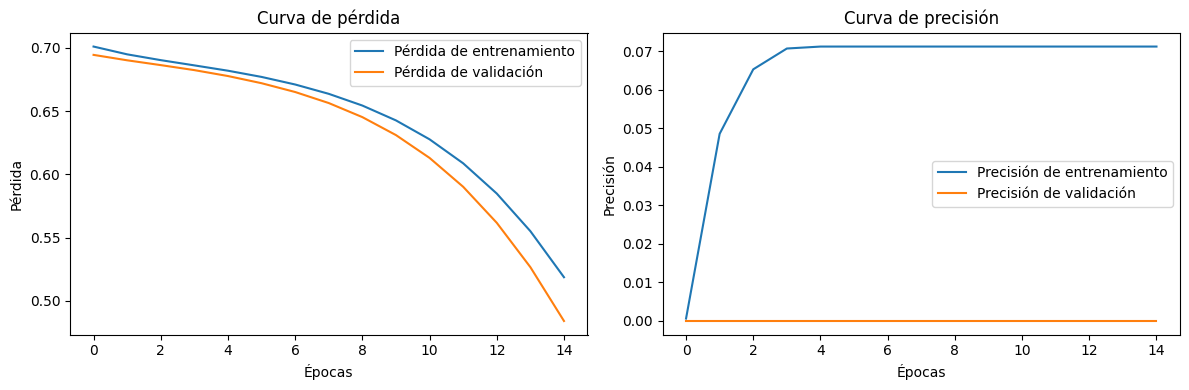

In [ ]:
import os
import numpy as np
import librosa
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, UpSampling1D, concatenate
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
import psutil
import time

# Función para cargar y procesar los audios
def load_and_process_audio(file_path, sr=16000, duration=1):  # Reducir la duración a 1 segundo
    y, _ = librosa.load(file_path, sr=sr, duration=duration)
    return y

# Función para cargar todos los audios de una carpeta
def load_audio_files(audio_folder_path, sr=16000, duration=1):  # Reducir la duración a 1 segundo
    audio_files = []
    for file_name in os.listdir(audio_folder_path):
        if file_name.endswith('.wav'):
            file_path = os.path.join(audio_folder_path, file_name)
            y = load_and_process_audio(file_path, sr, duration)
            audio_files.append(y)
    return np.array(audio_files)

# Ruta a las carpetas con los archivos de audio
audio_folder_path_noisy = '/content/drive/MyDrive/ML/Audios/Ruido_ambiente'  # Ruta donde están los archivos de audio con ruido
audio_folder_path_clean = '/content/drive/MyDrive/ML/Audios/Voces_Claras4'

# Cargar los audios y crear etiquetas
X_noisy = load_audio_files(audio_folder_path_noisy)
y_clean = load_audio_files(audio_folder_path_clean)

# Verifica que X_noisy y y_clean tengan la misma longitud
assert X_noisy.shape == y_clean.shape, "El número de muestras y la longitud de las muestras deben ser iguales."

# Añadir una dimensión extra para que sean compatibles con el modelo
X_noisy = X_noisy[..., np.newaxis]
y_clean = y_clean[..., np.newaxis]

# Verificar las dimensiones de los datos antes de dividir
print(f"Shape of X_noisy: {X_noisy.shape}")
print(f"Shape of y_clean: {y_clean.shape}")

# Dividir el dataset en entrenamiento (70%), validación (15%) y prueba (15%)
X_train, X_temp, y_train, y_temp = train_test_split(X_noisy, y_clean, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Asegurarse de que las dimensiones de los datos sean correctas
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of X_val: {X_val.shape}")
print(f"Shape of y_val: {y_val.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

print("X_train sample: ", X_train[0])
print("y_train sample: ", y_train[0])

# Función para construir el modelo WtoW
def build_wtow_model(input_shape):
    inputs = Input(input_shape)
    c1 = Conv1D(16, 3, activation='relu', padding='same')(inputs)
    p1 = MaxPooling1D(2)(c1)

    c2 = Conv1D(32, 3, activation='relu', padding='same')(p1)
    p2 = MaxPooling1D(2)(c2)

    c3 = Conv1D(64, 3, activation='relu', padding='same')(p2)
    p3 = MaxPooling1D(2)(c3)

    c4 = Conv1D(128, 3, activation='relu', padding='same')(p3)

    u5 = UpSampling1D(2)(c4)
    u5 = concatenate([u5, c3])
    c5 = Conv1D(64, 3, activation='relu', padding='same')(u5)

    u6 = UpSampling1D(2)(c5)
    u6 = concatenate([u6, c2])
    c6 = Conv1D(32, 3, activation='relu', padding='same')(u6)

    u7 = UpSampling1D(2)(c6)
    u7 = concatenate([u7, c1])
    c7 = Conv1D(16, 3, activation='relu', padding='same')(u7)

    outputs = Conv1D(1, 1, activation='sigmoid', padding='same')(c7)
    model = Model(inputs, outputs)
    return model

input_shape = (X_train.shape[1], 1)
model = build_wtow_model(input_shape)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

print(f"Memory usage before training: {psutil.virtual_memory().percent}%")

class CustomCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"Epoch {epoch} ended. Logs: {logs}")

start_time = time.time()

try:
    history = model.fit(
        X_train, y_train,
        epochs=15,
        batch_size=32,  # Reduce el tamaño del batch
        validation_data=(X_val, y_val),
        callbacks=[CustomCallback()]
    )
except Exception as e:
    print(f"Error during training: {e}")

end_time = time.time()
print(f"Training time: {end_time - start_time} seconds")
print(f"Memory usage after training: {psutil.virtual_memory().percent}%")

try:
    test_loss, test_accuracy = model.evaluate(X_test, y_test)
    print(f'Test Loss: {test_loss}')
    print(f'Test Accuracy: {test_accuracy}')
except Exception as e:
    print(f"Error during evaluation: {e}")

model.save('/content/drive/MyDrive/ML/WtoW_2_datasets_medio.h5')

##################################3

# Visualizar las curvas de aprendizaje
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

# Gráfico de la pérdida
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.title('Curva de pérdida')
plt.legend()

# Gráfico de la precisión
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.title('Curva de precisión')
plt.legend()

plt.tight_layout()
plt.show()


# prueba codigo anterior con cambio de labels (No carga en epocas(

In [ ]:
import os
import librosa
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, UpSampling1D, concatenate
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Función para cargar un archivo de audio y convertirlo en una onda
def load_and_trim_audio(file_path, duration=5, sr=16000):
    y, _ = librosa.load(file_path, sr=sr, duration=duration)
    return y

# Ruta a las carpetas con los archivos de audio
audio_folder_path_noisy = '/content/drive/MyDrive/ML/Audios/NoVoz'  # Ruta donde están los archivos de audio con ruido
audio_folder_path_clean = '/content/drive/MyDrive/ML/Audios/Voz'

# Lista para almacenar las ondas de audio y las etiquetas
audio_clips = []
labels = []

# Procesar todos los archivos de audio en la carpeta de voces claras
for file_name in os.listdir(audio_folder_path_clean):
    if file_name.endswith('.wav'):
        file_path = os.path.join(audio_folder_path_clean, file_name)
        audio_clip = load_and_trim_audio(file_path)
        audio_clips.append(audio_clip)
        labels.append(np.ones_like(audio_clip))  # Etiqueta 1 para audios con voces

# Procesar todos los archivos de audio en la carpeta de ruido
for file_name in os.listdir(audio_folder_path_noisy):
    if file_name.endswith('.wav'):
        file_path = os.path.join(audio_folder_path_noisy, file_name)
        audio_clip = load_and_trim_audio(file_path)
        audio_clips.append(audio_clip)
        labels.append(np.zeros_like(audio_clip))  # Etiqueta 0 para audios sin voces

# Convertir las listas a arrays de numpy
X = np.array(audio_clips)
y = np.array(labels)

# Añadir una dimensión extra para el canal
X = X[..., np.newaxis]
y = y[..., np.newaxis]

# Dividir el dataset en entrenamiento (70%), validación (15%) y prueba (15%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de validación:", X_val.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)

# Definir la arquitectura del modelo U-Net
def unet_model(input_shape):
    inputs = Input(input_shape)  # Definir la capa de entrada con la forma especificada
    # Encoder (camino de contracción)
    c1 = Conv1D(64, 3, activation='relu', padding='same')(inputs)  # Primera capa convolucional
    c1 = Conv1D(64, 3, activation='relu', padding='same')(c1)      # Segunda capa convolucional
    p1 = MaxPooling1D(2)(c1)  # Primera capa de pooling para reducir la dimensión

    c2 = Conv1D(128, 3, activation='relu', padding='same')(p1)  # Tercera capa convolucional
    c2 = Conv1D(128, 3, activation='relu', padding='same')(c2)  # Cuarta capa convolucional
    p2 = MaxPooling1D(2)(c2)  # Segunda capa de pooling

    c3 = Conv1D(256, 3, activation='relu', padding='same')(p2)  # Quinta capa convolucional
    c3 = Conv1D(256, 3, activation='relu', padding='same')(c3)  # Sexta capa convolucional
    p3 = MaxPooling1D(2)(c3)  # Tercera capa de pooling

    # Bottleneck (parte más profunda de la red)
    c4 = Conv1D(512, 3, activation='relu', padding='same')(p3)  # Séptima capa convolucional
    c4 = Conv1D(512, 3, activation='relu', padding='same')(c4)  # Octava capa convolucional

    # Decoder (camino de expansión)
    u6 = UpSampling1D(2)(c4)  # Primera capa de upsampling para aumentar la dimensión
    u6 = concatenate([u6, c3])  # Concatenar con la capa correspondiente del encoder
    c6 = Conv1D(256, 3, activation='relu', padding='same')(u6)  # Novena capa convolucional
    c6 = Conv1D(256, 3, activation='relu', padding='same')(c6)  # Décima capa convolucional

    u7 = UpSampling1D(2)(c6)  # Segunda capa de upsampling
    u7 = concatenate([u7, c2])  # Concatenar con la capa correspondiente del encoder
    c7 = Conv1D(128, 3, activation='relu', padding='same')(u7)  # Undécima capa convolucional
    c7 = Conv1D(128, 3, activation='relu', padding='same')(c7)  # Duodécima capa convolucional

    u8 = UpSampling1D(2)(c7)  # Tercera capa de upsampling
    u8 = concatenate([u8, c1])  # Concatenar con la capa correspondiente del encoder
    c8 = Conv1D(64, 3, activation='relu', padding='same')(u8)  # Decimotercera capa convolucional
    c8 = Conv1D(64, 3, activation='relu', padding='same')(c8)  # Decimocuarta capa convolucional

    outputs = Conv1D(1, 1, activation='sigmoid')(c8)  # Capa de salida con activación sigmoid para segmentación
    model = Model(inputs, outputs)  # Definir el modelo con las capas de entrada y salida
    return model  # Retornar el modelo U-Net

# Especificar el tamaño de entrada
input_shape = (X_train.shape[1], 1)
model = unet_model(input_shape)  # Crear una instancia del modelo U-Net con el tamaño de entrada especificado
# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])  # Compilar el modelo con el optimizador Adam y la función de pérdida de entropía cruzada binaria
# Mostrar el resumen del modelo
model.summary()  # Imprimir un resumen de la arquitectura del modelo

# Reducir el número de épocas a 4
history = model.fit(X_train, y_train, epochs=4, batch_size=32, validation_data=(X_val, y_val))

# Evaluar el modelo en el conjunto de prueba
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

# Guardar el modelo
model.save('/content/drive/MyDrive/ML/WtoW_2_datasets_medio2.h5')  # Cambia la ruta y el nombre del archivo según tus necesidades

# Graficar las curvas de pérdida y precisión
plt.figure(figsize=(14, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.title('Curva de pérdida')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.title('Curva de precisión')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

plt.show()


Tamaño del conjunto de entrenamiento: (42, 80000, 1)
Tamaño del conjunto de validación: (9, 80000, 1)
Tamaño del conjunto de prueba: (9, 80000, 1)
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 80000, 1)]           0         []                            
                                                                                                  
 conv1d (Conv1D)             (None, 80000, 64)            256       ['input_1[0][0]']             
                                                                                                  
 conv1d_1 (Conv1D)           (None, 80000, 64)            12352     ['conv1d[0][0]']              
                                                                                                  
 max_pooling1d (MaxPooling1  (None, 40000, 64)

# Prueba con CNN (FUNCIONA CON 0.4 DE PRECISION)

Preparacion de los datos 1 (relleno de espectrogramas de ruido)

In [ ]:
import librosa
import numpy as np
import os
from pathlib import Path

def audio_to_spectrogram(file_path, target_shape=(1025, 938)):
    y, sr = librosa.load(file_path, sr=None)  # Cargar archivo de audio
    S = librosa.stft(y)  # STFT del audio
    D = np.abs(S)  # Obtener la magnitud del espectrograma
    DB = librosa.amplitude_to_db(D, ref=np.max)  # Convertir a decibelios

    # Ajustar el tamaño del espectrograma
    if DB.shape[1] < target_shape[1]:
        # Rellenar las columnas faltantes con el valor mínimo del espectrograma
        padding = np.min(DB) * np.ones((target_shape[0], target_shape[1] - DB.shape[1]))
        DB = np.hstack((DB, padding))

    return DB

def load_audios_and_convert(ruta_voces, ruta_ruido):
    espectrogramas = []
    etiquetas = []

    # Procesar audios de voces
    for file in os.listdir(ruta_voces):
        file_path = os.path.join(ruta_voces, file)
        if file_path.endswith('.wav'):  # Asegúrate de procesar solo archivos wav
            espectrograma = audio_to_spectrogram(file_path)
            espectrogramas.append(espectrograma)
            etiquetas.append(1)  # Suponiendo 1 para voces
            #print(f"Espectrograma de voz: {file_path} dimensiones: {espectrograma.shape}")

    # Procesar audios de ruido
    for file in os.listdir(ruta_ruido):
        file_path = os.path.join(ruta_ruido, file)
        if file_path.endswith('.wav'):  # Asegúrate de procesar solo archivos wav
            espectrograma = audio_to_spectrogram(file_path, target_shape=(1025, 938))
            espectrogramas.append(espectrograma)
            etiquetas.append(0)  # Suponiendo 0 para ruido
            #print(f"Espectrograma de ruido: {file_path} dimensiones: {espectrograma.shape}")

    return espectrogramas, etiquetas

# Usa las funciones
ruta_voces = '/content/drive/MyDrive/ML/Audios/Voz'
ruta_ruido = '/content/drive/MyDrive/ML/Audios/NoVoz'
espectrogramas, etiquetas = load_audios_and_convert(ruta_voces, ruta_ruido)

print("Espectrogramas y etiquetas creados")



Espectrogramas y etiquetas creados


Preparacion de los datos 2 (eliminacion de espectrogramas de ruido)

In [ ]:
import librosa
import numpy as np
import os
from pathlib import Path

def audio_to_spectrogram(file_path, target_shape=(1025, 431)):
    y, sr = librosa.load(file_path, sr=None)  # Cargar archivo de audio
    S = librosa.stft(y)  # STFT del audio
    D = np.abs(S)  # Obtener la magnitud del espectrograma
    DB = librosa.amplitude_to_db(D, ref=np.max)  # Convertir a decibelios

    # Recortar el espectrograma para que coincida con target_shape si es necesario
    if DB.shape[1] > target_shape[1]:
        DB = DB[:, :target_shape[1]]  # Recortar las columnas excedentes

    return DB

def load_audios_and_convert(ruta_voces, ruta_ruido):
    espectrogramas = []
    etiquetas = []

    # Procesar audios de voces
    for file in os.listdir(ruta_voces):
        file_path = os.path.join(ruta_voces, file)
        if file_path.endswith('.wav'):  # Asegúrate de procesar solo archivos wav
            espectrograma = audio_to_spectrogram(file_path, target_shape=(1025, 431))
            espectrogramas.append(espectrograma)
            etiquetas.append(1)  # Suponiendo 1 para voces

    # Procesar audios de ruido
    for file in os.listdir(ruta_ruido):
        file_path = os.path.join(ruta_ruido, file)
        if file_path.endswith('.wav'):  # Asegúrate de procesar solo archivos wav
            espectrograma = audio_to_spectrogram(file_path, target_shape=(1025, 431))
            espectrogramas.append(espectrograma)
            etiquetas.append(0)  # Suponiendo 0 para ruido

    return espectrogramas, etiquetas

# Usa las funciones
ruta_voces = '/content/drive/MyDrive/ML/Audios/Voz'
ruta_ruido = '/content/drive/MyDrive/ML/Audios/NoVoz'
espectrogramas, etiquetas = load_audios_and_convert(ruta_voces, ruta_ruido)

print("Espectrogramas y etiquetas creados")


Division dataset

In [ ]:
from sklearn.model_selection import train_test_split

def split_data(espectrogramas, etiquetas, train_size=0.7, val_size=0.15, test_size=0.15):
    # Primero, dividimos en entrenamiento y temporal (validación + prueba)
    X_train, X_temp, y_train, y_temp = train_test_split(
        espectrogramas, etiquetas, train_size=train_size, random_state=42
    )

    # Ahora, dividimos el temporal en validación y prueba
    # Calculamos la nueva proporción para el split basado en el tamaño restante
    val_test_ratio = val_size / (val_size + test_size)
    X_val, X_test, y_val, y_test = train_test_split(
        X_temp, y_temp, train_size=val_test_ratio, random_state=42
    )

    return X_train, X_val, X_test, y_train, y_val, y_test

# Suponiendo que 'espectrogramas' y 'etiquetas' son tus datos cargados
X_train, X_val, X_test, y_train, y_val, y_test = split_data(espectrogramas, etiquetas)

# Verificación de las divisiones
print("Tamaño del conjunto de entrenamiento:", len(X_train))
print("Tamaño del conjunto de validación:", len(X_val))
print("Tamaño del conjunto de prueba:", len(X_test))

print("Division del dataset listo")


import numpy as np

# Convertir listas a arrays numpy y asegurar que todos los datos tengan la forma correcta
X_train = np.array(X_train)[..., np.newaxis]  # Añade una dimensión de canal
X_val = np.array(X_val)[..., np.newaxis]
X_test = np.array(X_test)[..., np.newaxis]

y_train = np.array(y_train)
y_val = np.array(y_val)
y_test = np.array(y_test)

# Verificar las formas de los datos
print("Forma de X_train:", X_train.shape)
print("Forma de X_val:", X_val.shape)
print("Forma de X_test:", X_test.shape)
print("Forma de y_train:", y_train.shape)
print("Forma de y_val:", y_val.shape)
print("Forma de y_test:", y_test.shape)



Tamaño del conjunto de entrenamiento: 21
Tamaño del conjunto de validación: 4
Tamaño del conjunto de prueba: 5
Division del dataset listo
Forma de X_train: (21, 1025, 938, 1)
Forma de X_val: (4, 1025, 938, 1)
Forma de X_test: (5, 1025, 938, 1)
Forma de y_train: (21,)
Forma de y_val: (4,)
Forma de y_test: (5,)


Modelo

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.metrics import Precision, Recall  # Asegúrate de importar estas clases

def create_cnn_model():
    # El shape del input se definirá dinámicamente basado en los datos
    model = Sequential()

    # Capa convolucional 1
    model.add(Conv2D(16, (3, 3), activation='relu', padding='same', input_shape=(1025, 938, 1)))  # Ajustar según la forma de tus datos
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))

    # Capa convolucional 2
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.3))

    # Capa convolucional 3
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.4))

    # Capa de aplanamiento
    model.add(Flatten())

    # Capa densa
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))

    # Capa de salida
    model.add(Dense(1, activation='sigmoid'))

    # Compilación del modelo
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', Precision(), Recall()])

    return model


################################Entrenamiento#######################

# Preparar los datos (asegúrate de que los datos estén correctamente dimensionados y normalizados)

# Crear el modelo
model = create_cnn_model()

# Entrenar el modelo
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_val, y_val),
    verbose=2
)

# Evaluar el modelo en el conjunto de prueba
test_loss, test_accuracy, test_precision, test_recall = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}, Test Precision: {test_precision}, Test Recall: {test_recall}")

# Opcional: generar reporte de clasificación
from sklearn.metrics import classification_report
y_pred = model.predict(X_test) > 0.5  # Convertir probabilidades a etiquetas binarias
print(classification_report(y_test, y_pred, target_names=['Ruido', 'Voz']))

# Guardar el modelo
model.save('/content/drive/MyDrive/ML/CNN.h5')  # Cambia la ruta y el nombre del archivo según tus necesidades

Epoch 1/10
1/1 - 45s - loss: 1.2330 - accuracy: 0.5714 - precision: 0.7143 - recall: 0.4167 - val_loss: 7387.3525 - val_accuracy: 0.2500 - val_precision: 0.2500 - val_recall: 1.0000 - 45s/epoch - 45s/step
Epoch 2/10
1/1 - 32s - loss: 318.9131 - accuracy: 0.5714 - precision: 0.5714 - recall: 1.0000 - val_loss: 809.2661 - val_accuracy: 0.2500 - val_precision: 0.2500 - val_recall: 1.0000 - 32s/epoch - 32s/step
Epoch 3/10
1/1 - 34s - loss: 0.0000e+00 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 313.8538 - val_accuracy: 0.7500 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - 34s/epoch - 34s/step
Epoch 4/10
1/1 - 33s - loss: 20.6691 - accuracy: 0.9048 - precision: 1.0000 - recall: 0.8333 - val_loss: 370.9863 - val_accuracy: 0.7500 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - 33s/epoch - 33s/step
Epoch 5/10
1/1 - 33s - loss: 53.2826 - accuracy: 0.8095 - precision: 1.0000 - recall: 0.6667 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - val_precision: 1.00

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/keras/src/engine/trainin

Entrenamiento y evaluacion 1

In [ ]:
# Asumiendo que 'X_train' es tu conjunto de entrenamiento y que ya ha sido preprocesado y está listo para ser usado
input_shape = X_train.shape[1:]  # Ignora el tamaño del lote en el shape
model = create_cnn_model(input_shape)

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val), batch_size=32)

# Evaluar el modelo
model.evaluate(X_test, y_test)


Entrenamiento y evaluacion 2

In [ ]:
# Preparar los datos (asegúrate de que los datos estén correctamente dimensionados y normalizados)

# Crear el modelo
model = create_cnn_model()

# Entrenar el modelo
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val, y_val),
    verbose=2
)

# Evaluar el modelo en el conjunto de prueba
test_loss, test_accuracy, test_precision, test_recall = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}, Test Precision: {test_precision}, Test Recall: {test_recall}")

# Opcional: generar reporte de clasificación
from sklearn.metrics import classification_report
y_pred = model.predict(X_test) > 0.5  # Convertir probabilidades a etiquetas binarias
print(classification_report(y_test, y_pred, target_names=['Ruido', 'Voz']))

